In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
!pip install koreanize-matplotlib
import koreanize_matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/프로젝트/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/프로젝트/olist_geolocation_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/프로젝트/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/프로젝트/olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('/content/drive/MyDrive/프로젝트/olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv('/content/drive/MyDrive/프로젝트/olist_orders_dataset.csv')
products_dataset = pd.read_csv('/content/drive/MyDrive/프로젝트/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/프로젝트/olist_sellers_dataset.csv')

# Task
"1회성 고객을 재구매 고객으로 : 이탈 방지 요인 분석 및 전략 제안” (로열티) 현황 재구매자 전체의 3% 1회구매자(잠재 재구매자) 97% “97% 모두를 재구매로 전환하긴 어렵다. 그렇다면, 이 중 '가능성 있는 고객'은 누구인가?” 타겟설정 : 잠재구매자 정의 1회구매자 중 높은 상품만족도(리뷰) 높은 1회 구매자 대상 구매 상품이 소모성 /반복성 있는 카테고리 구매자 대상 이탈 전환포인트 파악 : 고객경험에서 파악 (투트랙)를 시각화 자료로 만들어줘 그리고 중복되지 않게 하고 오류 생기면 고치면서 새로운 코드 밑에 만들지마

## 이전 분석 결과 확인 및 데이터 준비

### Subtask:
이전에 수행했던 1회 주문 고객 분석(결제, 배송, 수령, 사후 확인 단계) 결과를 다시 확인하고, 시각화에 필요한 데이터프레임이 준비되었는지 확인합니다.


**Reasoning**:
Check the available variables to see if the necessary dataframes for visualization are already prepared from previous steps.



In [ ]:
%whos DataFrame

Variable                                      Type         Data/Info
--------------------------------------------------------------------
average_review_by_category                    DataFrame                             <...>\n\n[73 rows x 2 columns]
average_review_by_delivery_status             DataFrame       is_late_delivery  revi<...>       True      2.274793
average_review_by_payment_type                DataFrame      payment_type  review_sc<...>    voucher      3.991322
canceled_category_distribution                DataFrame                             <...>_de_natal               1
canceled_orders_df                            DataFrame                             <...>\n[504 rows x 38 columns]
canceled_payment_distribution                 DataFrame      payment_type  canceled_<...>ebit_card               6
canceled_state_distribution                   DataFrame       customer_state  cancel<...>       MS               1
cancellation_rate_by_delivery                 DataFrame  

**Reasoning**:
Based on the available dataframes, it seems that the necessary data for visualizing customer segmentation based on purchase frequency and review scores, as well as cancellation and late delivery analysis, is already present. I will now examine the columns and data types of the relevant dataframes to ensure they are suitable for visualization.



In [ ]:
print("Info for high_score_and_single_occurrence_customers:")
high_score_and_single_occurrence_customers.info()
print("\nInfo for non_potential_repeat_customers_df:")
non_potential_repeat_customers_df.info()
print("\nInfo for canceled_orders_df:")
canceled_orders_df.info()
print("\nInfo for late_delivery_by_state:")
late_delivery_by_state.info()
print("\nInfo for late_delivery_by_category:")
late_delivery_by_category.info()
print("\nInfo for cancellation_rate_by_delivery:")
cancellation_rate_by_delivery.info()
print("\nInfo for potential_customer_state_distribution:")
potential_customer_state_distribution.info()
print("\nInfo for non_potential_customer_state_distribution:")
non_potential_customer_state_distribution.info()
print("\nInfo for potential_product_category_distribution:")
potential_product_category_distribution.info()
print("\nInfo for non_potential_product_category_distribution:")
non_potential_product_category_distribution.info()

Info for high_score_and_single_occurrence_customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70252 entries, 0 to 70251
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  70252 non-null  object
 1   customer_id               70252 non-null  object
 2   customer_unique_id        70252 non-null  object
 3   customer_zip_code_prefix  70252 non-null  int64 
 4   customer_city             70252 non-null  object
 5   customer_state            70252 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.2+ MB

Info for non_potential_repeat_customers_df:
<class 'pandas.core.frame.DataFrame'>
Index: 74833 entries, 2 to 110772
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       74833 non-null  object        
 1   c

## 결제 프로세스 분석 시각화

### Subtask:
결제 승인 소요 시간 분포 및 결제 수단 분포에 대한 시각화 자료를 생성합니다.


**Reasoning**:
Create visualizations for the distribution of payment approval times and payment types as requested in the subtask.



<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='approval_time'>

Text(0.5, 0, '')

Text(0, 0.5, '결제 승인 소요 시간 (분)')

Text(0.5, 1.0, '결제 승인 소요 시간 분포 (박스플롯)')

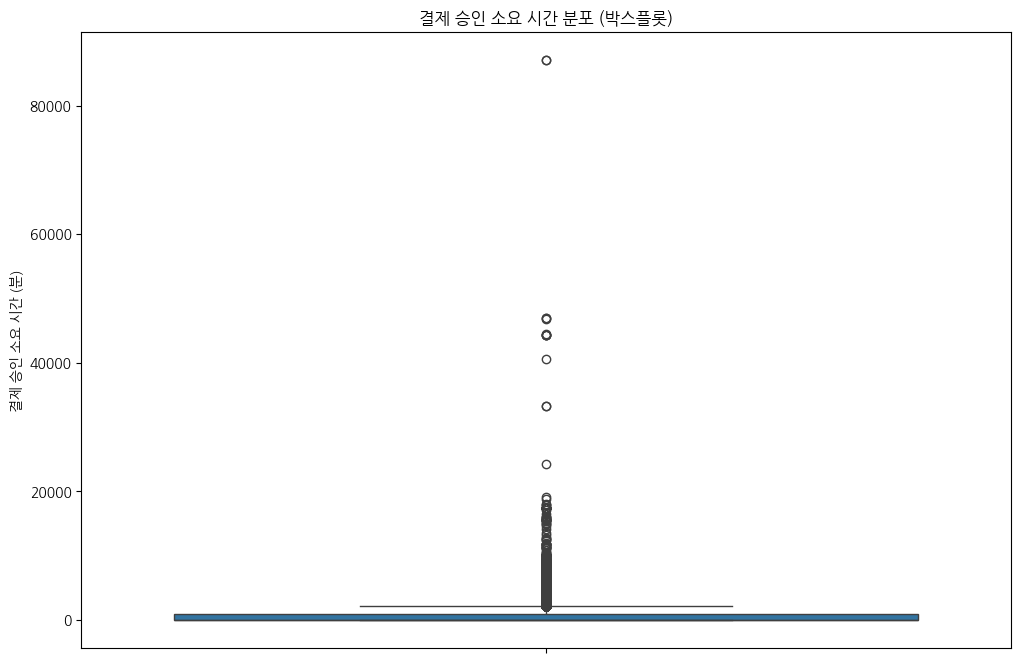

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='payment_type', ylabel='customer_count'>

Text(0.5, 0, '결제 수단')

Text(0, 0.5, '고객 수')

Text(0.5, 1.0, '결제 수단 분포')

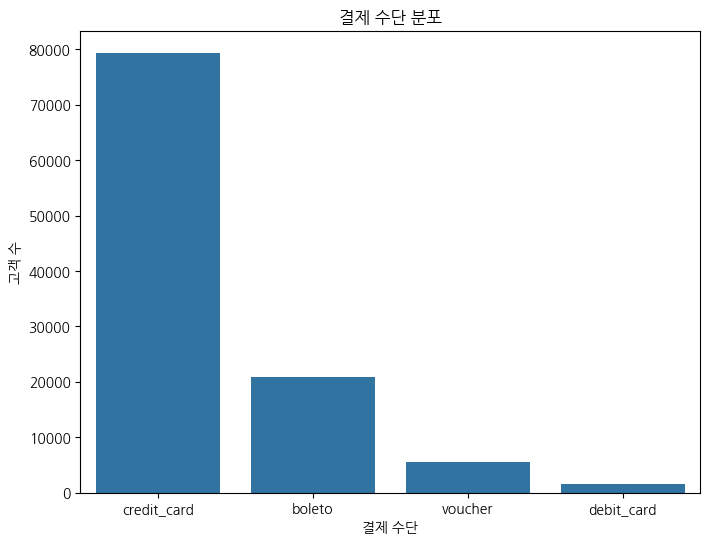

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=orders_items_products_merged, y='approval_time') # Change to boxplot
plt.xlabel("") # Remove x-label as it's a single boxplot
plt.ylabel("결제 승인 소요 시간 (분)")
plt.title("결제 승인 소요 시간 분포 (박스플롯)") # Update title
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=payment_type_distribution, x='payment_type', y='customer_count')
plt.xlabel("결제 수단")
plt.ylabel("고객 수")
plt.title("결제 수단 분포")
plt.show()

**Reasoning**:
The previous attempt failed because the column 'approval_time' was not found in `merged_df`. I need to check the columns of `merged_df` to identify the correct column name for payment approval time and regenerate the histogram code.



In [ ]:
print(merged_df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_state'],
      dtype='object')


**Reasoning**:
The column `approval_time` is not in `merged_df`. Based on the available columns and the previous analysis, the payment approval time was likely calculated and added to a different DataFrame or was intended to be calculated using `order_purchase_timestamp` and `order_approved_at`. I will use `orders_items_products_merged` which contains both columns and calculate the approval time there before plotting. I will also proceed with plotting the payment type distribution which did not have an error.



<Figure size 1200x840 with 0 Axes>

<Axes: xlabel='approval_time', ylabel='Count'>

Text(0.5, 0, '결제 승인 소요 시간 (분)')

Text(0, 0.5, '빈도')

Text(0.5, 1.0, '결제 승인 소요 시간 분포')

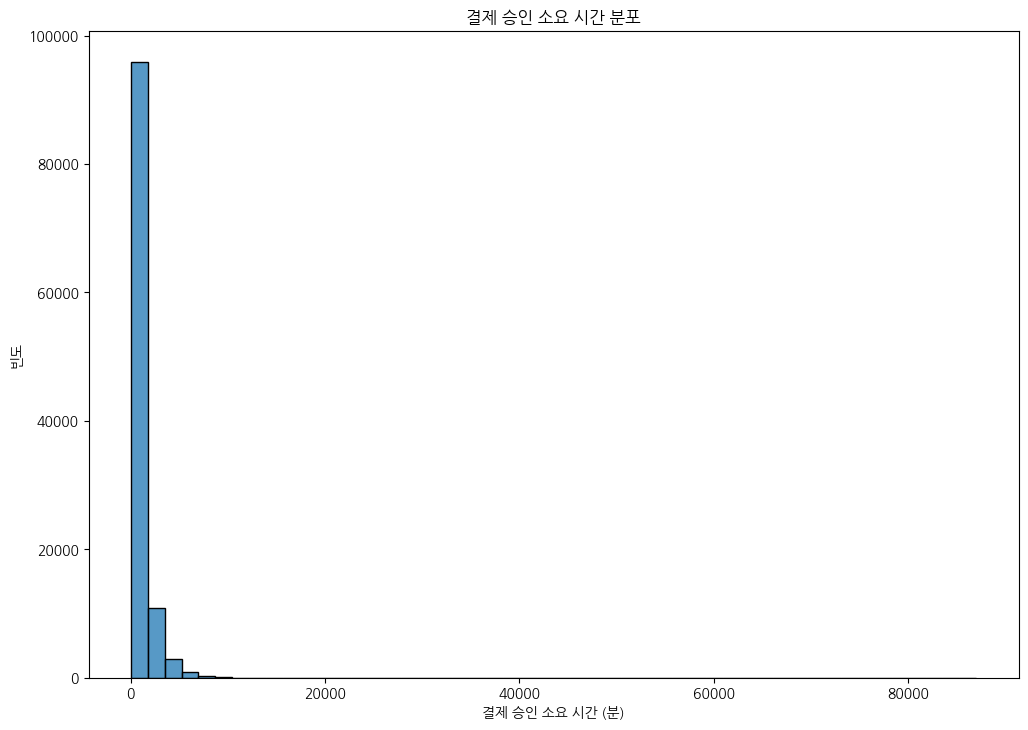

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='payment_type', ylabel='customer_count'>

Text(0.5, 0, '결제 수단')

Text(0, 0.5, '고객 수')

Text(0.5, 1.0, '결제 수단 분포')

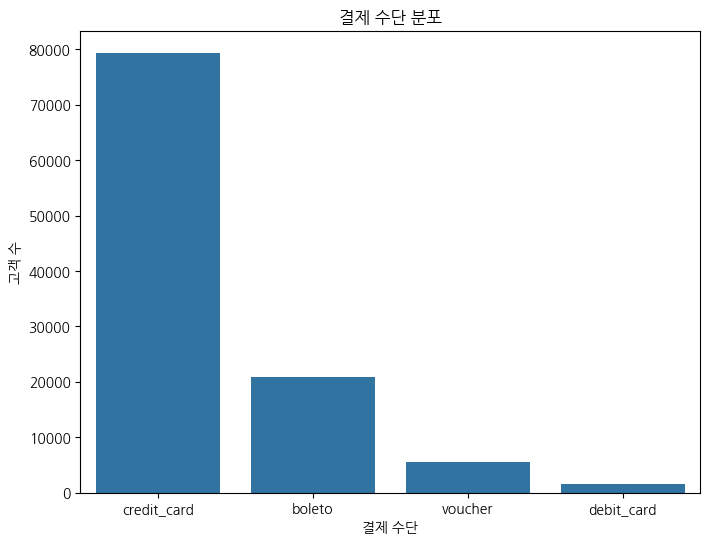

In [ ]:
orders_items_products_merged['order_purchase_timestamp'] = pd.to_datetime(orders_items_products_merged['order_purchase_timestamp'])
orders_items_products_merged['order_approved_at'] = pd.to_datetime(orders_items_products_merged['order_approved_at'])
orders_items_products_merged['approval_time'] = (orders_items_products_merged['order_approved_at'] - orders_items_products_merged['order_purchase_timestamp']).dt.total_seconds() / 60

plt.figure(figsize=figsize)
sns.histplot(data=orders_items_products_merged, x='approval_time', bins=50)
plt.xlabel("결제 승인 소요 시간 (분)")
plt.ylabel("빈도")
plt.title("결제 승인 소요 시간 분포")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=payment_type_distribution, x='payment_type', y='customer_count')
plt.xlabel("결제 수단")
plt.ylabel("고객 수")
plt.title("결제 수단 분포")
plt.show()

## 배송 단계 분석 시각화

### Subtask:
전반적인 배송 지연율, 주별 및 카테고리별 배송 지연율, 운임별 배송 지연 상관관계에 대한 시각화 자료를 생성합니다.


**Reasoning**:
Create visualizations for delivery delay analysis, including the cancellation rate by delivery delay, late delivery rate by state, late delivery rate by product category, and the relationship between freight value and delivery delay.



<Figure size 800x600 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='cancellation_rate'>

Text(0.5, 0, '취소율 (%)')

Text(0, 0.5, '배송 지연 여부')

Text(0.5, 1.0, '배송 지연 여부에 따른 주문 취소율')

([<matplotlib.axis.XTick at 0x78f5fbdd3010>,
 [Text(False, 0, '정시 배송'), Text(True, 0, '지연 배송')])

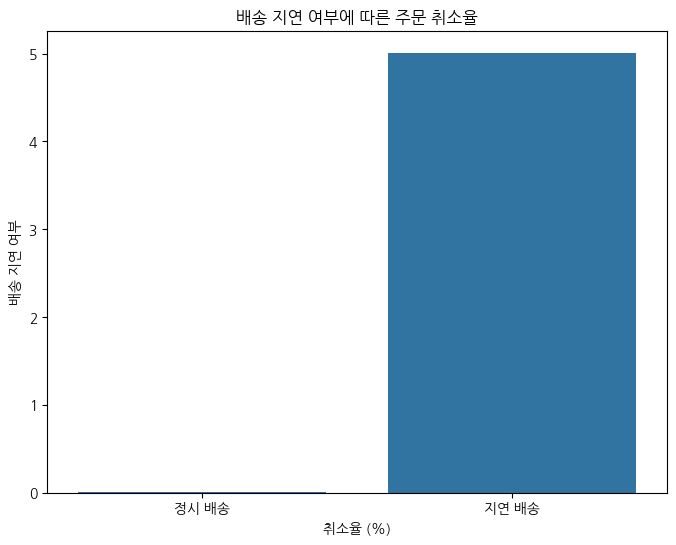

<Figure size 1200x840 with 0 Axes>

<Axes: xlabel='customer_state', ylabel='late_delivery_rate'>

Text(0.5, 0, '주')

Text(0, 0.5, '배송 지연율 (%)')

Text(0.5, 1.0, '주별 배송 지연율 (상위 10개 주)')

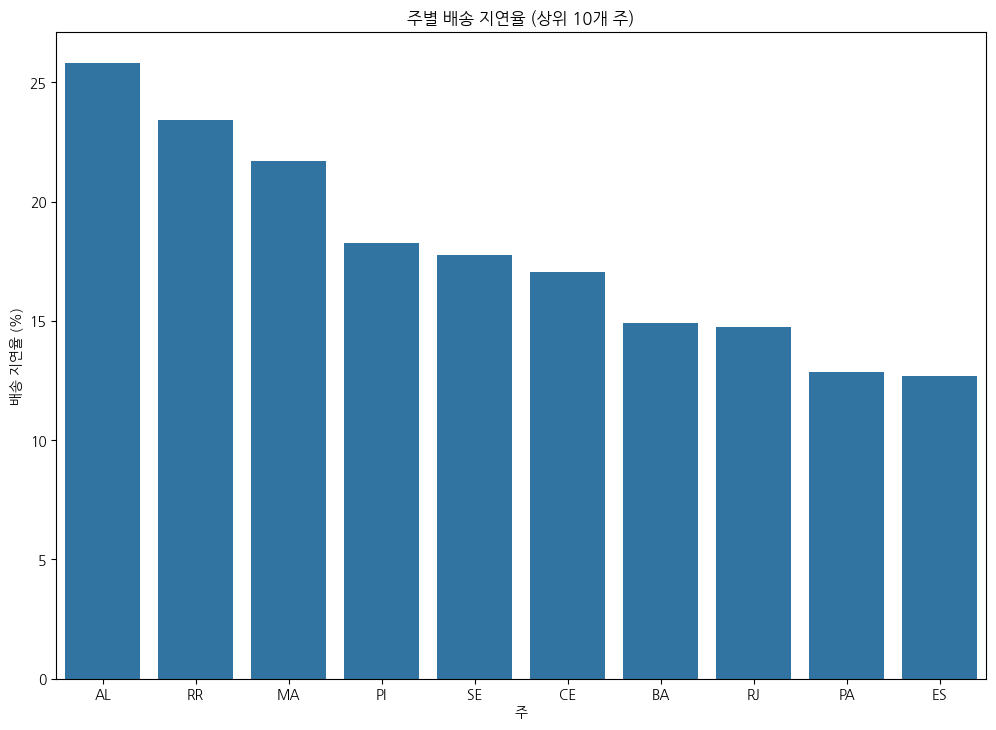

<Figure size 1200x840 with 0 Axes>

<Axes: xlabel='product_category_name', ylabel='late_delivery_rate'>

Text(0.5, 0, '상품 카테고리')

Text(0, 0.5, '배송 지연율 (%)')

Text(0.5, 1.0, '상품 카테고리별 배송 지연율 (상위 15개 카테고리)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'casa_conforto_2'),
  Text(1, 0, 'fashion_roupa_feminina'),
  Text(2, 0, 'moveis_colchao_e_estofado'),
  Text(3, 0, 'fashion_underwear_e_moda_praia'),
  Text(4, 0, 'fashion_roupa_infanto_juvenil'),
  Text(5, 0, 'fashion_roupa_masculina'),
  Text(6, 0, 'audio'),
  Text(7, 0, 'instrumentos_musicais'),
  Text(8, 0, 'artes'),
  Text(9, 0, 'construcao_ferramentas_seguranca'),
  Text(10, 0, 'pc_gamer'),
  Text(11, 0, 'casa_conforto'),
  Text(12, 0, 'bebes'),
  Text(13, 0, 'consoles_games'),
  Text(14, 0, 'dvds_blu_ray')])

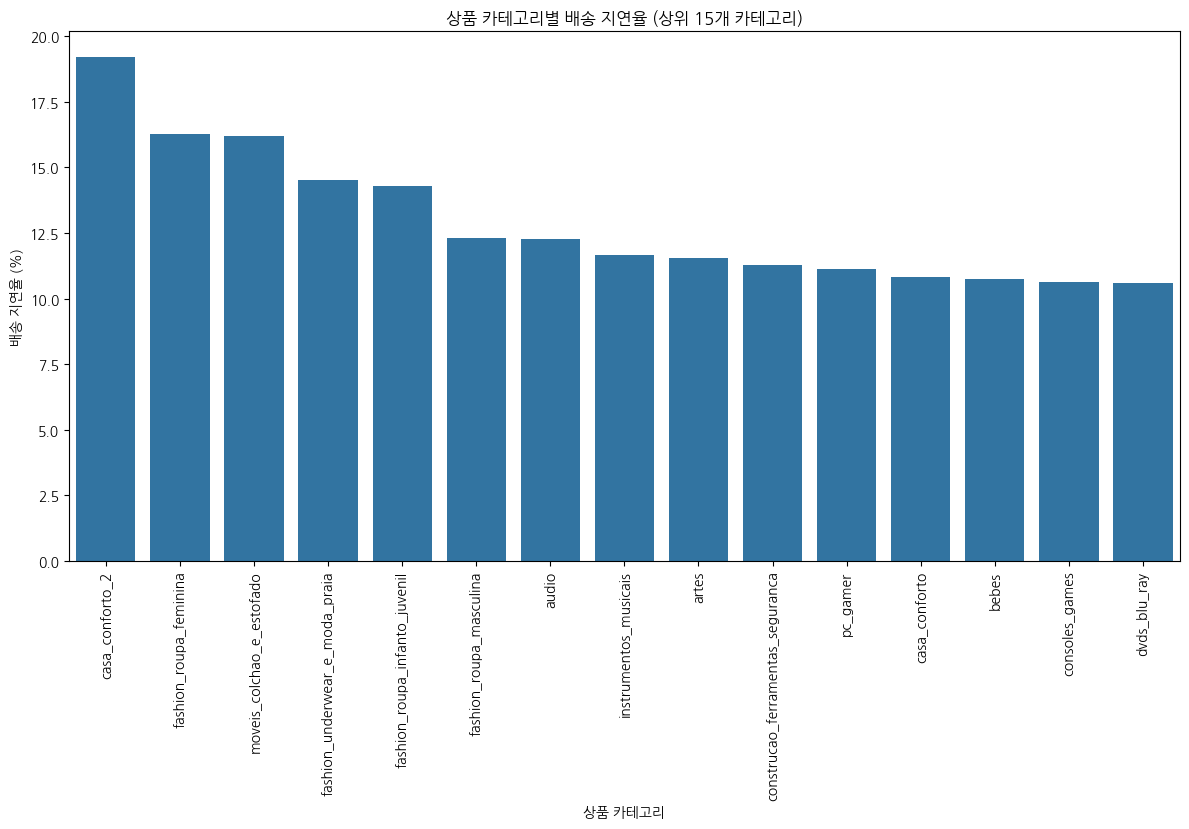

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='freight_value'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '운임')

Text(0.5, 1.0, '운임과 배송 지연 여부 관계')

([<matplotlib.axis.XTick at 0x78f6022d86d0>,
 [Text(0, 0, '정시 배송'), Text(1, 0, '지연 배송')])

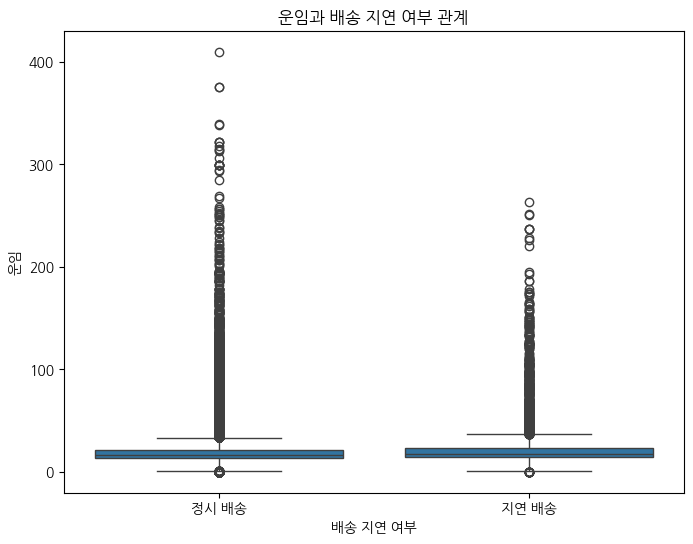

In [205]:
plt.figure(figsize=(8, 6))
sns.barplot(data=cancellation_rate_by_delivery, x='is_late_delivery', y='cancellation_rate')
plt.xlabel("취소율 (%)")
plt.ylabel("배송 지연 여부")
plt.title("배송 지연 여부에 따른 주문 취소율")
plt.xticks([False, True], ['정시 배송', '지연 배송']) # Provide labels for both False and True
plt.show()

top_n = 10
plt.figure(figsize=figsize)
sns.barplot(data=late_delivery_by_state.head(top_n), x='customer_state', y='late_delivery_rate')
plt.xlabel("주")
plt.ylabel("배송 지연율 (%)")
plt.title(f"주별 배송 지연율 (상위 {top_n}개 주)")
plt.show()

top_n_categories = 15
plt.figure(figsize=figsize)
sns.barplot(data=late_delivery_by_category.head(top_n_categories), x='product_category_name', y='late_delivery_rate')
plt.xlabel("상품 카테고리")
plt.ylabel("배송 지연율 (%)")
plt.title(f"상품 카테고리별 배송 지연율 (상위 {top_n_categories}개 카테고리)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=single_purchase_df, x='is_late_delivery', y='freight_value')
plt.xlabel("배송 지연 여부")
plt.ylabel("운임")
plt.title("운임과 배송 지연 여부 관계")
plt.xticks([0, 1], ['정시 배송', '지연 배송'])
plt.show()

**Reasoning**:
The previous attempt to create a box plot of freight value by delivery delay failed because the column 'is_late_delivery' is not in the `merged_df` dataframe. Need to use the correct dataframe that contains 'is_late_delivery' and 'freight_value'. The `single_purchase_df` and `non_potential_repeat_customers_df` both contain these columns, so I will use `single_purchase_df` as an example to fix the error and create the box plot.



<Figure size 800x600 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='freight_value'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '운임 (로그 스케일)')

Text(0.5, 1.0, '운임과 배송 지연 여부 관계')

([<matplotlib.axis.XTick at 0x78f602777d90>,
 [Text(0, 0, '정시 배송'), Text(1, 0, '지연 배송')])

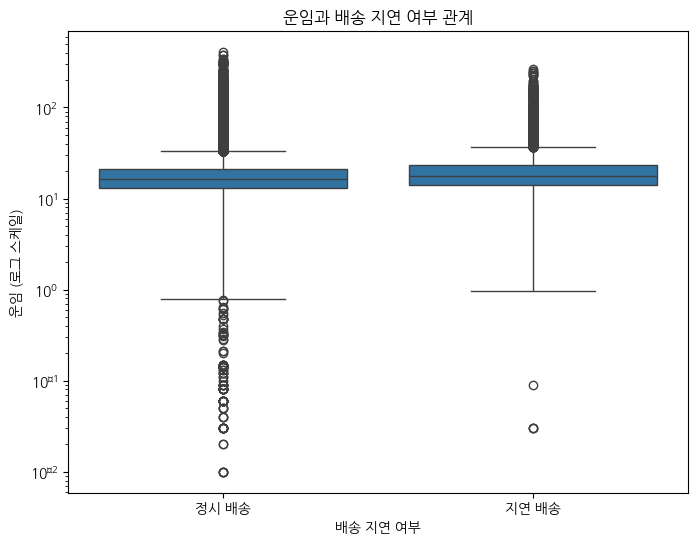

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Ensure pandas is imported if not already

# Ensure Korean font is used
plt.rcParams['font.family'] = 'NanumGothic' # Or 'Malgun Gothic' on Windows

plt.figure(figsize=(8, 6))
sns.boxplot(data=single_purchase_df, x='is_late_delivery', y='freight_value')
plt.xlabel("배송 지연 여부")
plt.ylabel("운임 (로그 스케일)") # Update y-label
plt.title("운임과 배송 지연 여부 관계")
plt.xticks([0, 1], ['정시 배송', '지연 배송'])
plt.yscale('log') # Apply logarithmic scale to y-axis
plt.show()

## 수령 단계 분석 시각화

### Subtask:
배송 지연 여부에 따른 주문 취소율 등 수령 단계와 관련된 분석 결과에 대한 시각화 자료를 생성합니다.


**Reasoning**:
Visualize the cancellation rate by delivery status using a bar plot as requested in the instructions.



<Figure size 1200x840 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='cancellation_rate'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '주문 취소율')

Text(0.5, 1.0, '배송 지연 여부에 따른 주문 취소율')

([<matplotlib.axis.XTick at 0x78f5ef67ce90>,
 [Text(0, 0, '정시 배송'), Text(1, 0, '지연 배송')])

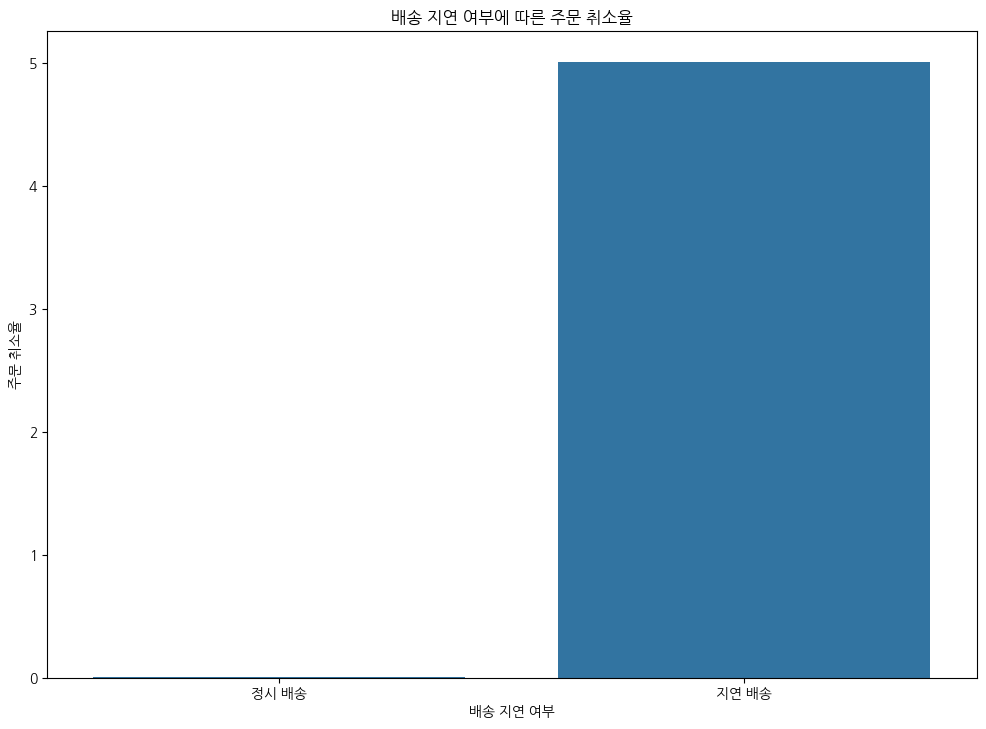

In [ ]:
plt.figure(figsize=figsize)
sns.barplot(data=cancellation_rate_by_delivery, x='is_late_delivery', y='cancellation_rate')
plt.xlabel("배송 지연 여부")
plt.ylabel("주문 취소율")
plt.title("배송 지연 여부에 따른 주문 취소율")
plt.xticks([0, 1], ['정시 배송', '지연 배송'])
plt.show()

## 사후 확인 단계 분석 시각화

### Subtask:
리뷰 점수 분포, 배송 지연 여부에 따른 리뷰 점수 분포 등 사후 확인 단계와 관련된 분석 결과에 대한 시각화 자료를 생성합니다.


**Reasoning**:
Create bar plot for review score distribution and box plot for review score by delivery status.



<Figure size 1200x840 with 0 Axes>

<Axes: xlabel='review_score', ylabel='percentage'>

Text(0.5, 0, '리뷰 점수')

Text(0, 0.5, '고객 비율')

Text(0.5, 1.0, '리뷰 점수 분포')

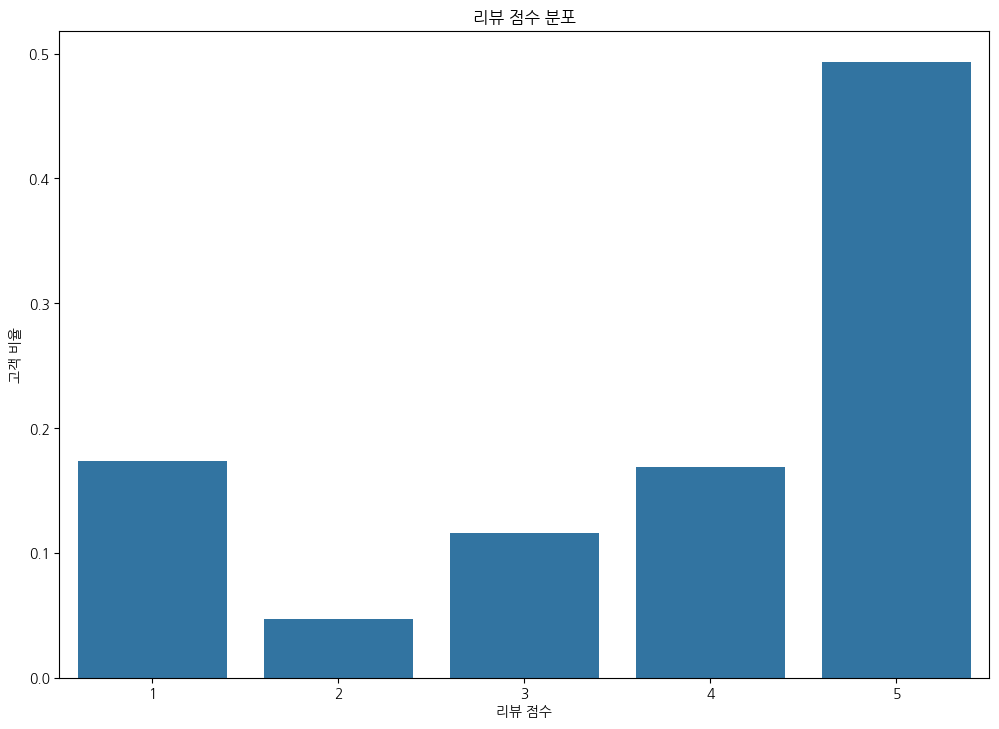

<Figure size 1200x840 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='review_score'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '리뷰 점수')

Text(0.5, 1.0, '배송 지연 여부에 따른 리뷰 점수 분포')

([<matplotlib.axis.XTick at 0x78f602756f50>,
 [Text(0, 0, '정시 배송'), Text(1, 0, '지연 배송')])

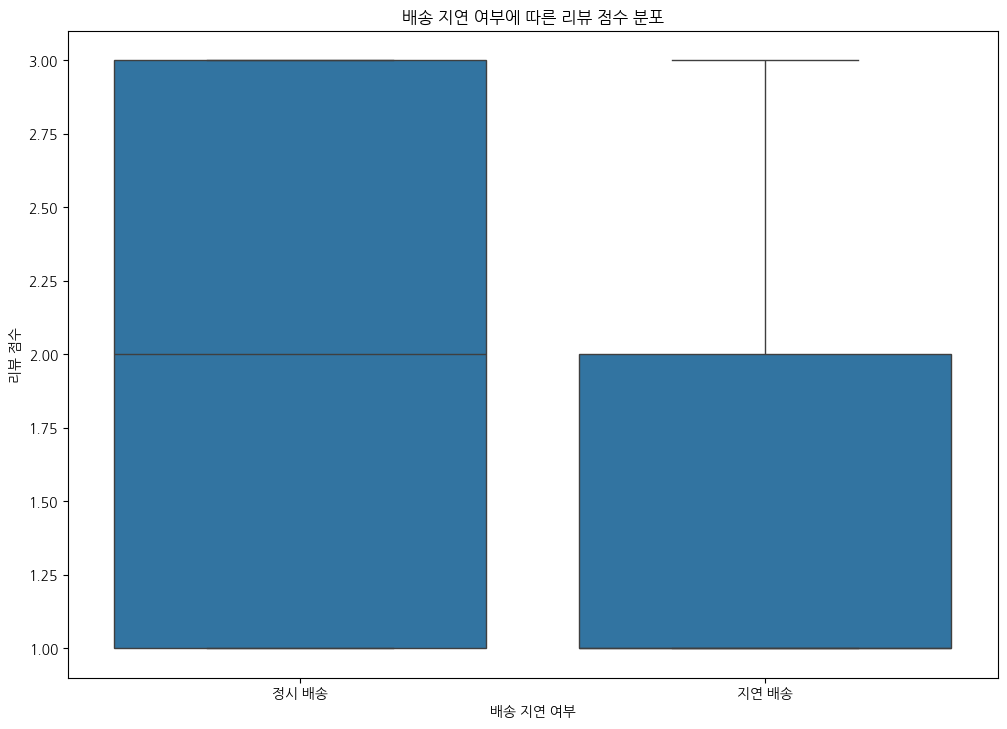

In [ ]:
plt.figure(figsize=figsize)
sns.barplot(data=non_potential_review_score_distribution, x='review_score', y='percentage')
plt.xlabel("리뷰 점수")
plt.ylabel("고객 비율")
plt.title("리뷰 점수 분포")
plt.show()

plt.figure(figsize=figsize)
sns.boxplot(data=negative_reviews_single_purchase, x='is_late_delivery', y='review_score')
plt.xlabel("배송 지연 여부")
plt.ylabel("리뷰 점수")
plt.title("배송 지연 여부에 따른 리뷰 점수 분포")
plt.xticks([0, 1], ['정시 배송', '지연 배송'])
plt.show()

**Reasoning**:
The previous attempt to plot the box plot for review score by delivery status failed because the 'is_late_delivery' column was not found in 'merged_df'. Inspect the available dataframes to find which one contains 'is_late_delivery' and 'review_score' and contains review score information.



In [ ]:
%whos DataFrame
print(merged_df.columns)
print(high_review_single_purchase_df.columns)
print(negative_reviews_single_purchase.columns)

Variable                                      Type         Data/Info
--------------------------------------------------------------------
average_review_by_category                    DataFrame                             <...>\n\n[73 rows x 2 columns]
average_review_by_delivery_status             DataFrame       is_late_delivery  revi<...>       True      2.274793
average_review_by_payment_type                DataFrame      payment_type  review_sc<...>    voucher      3.991322
canceled_category_distribution                DataFrame                             <...>_de_natal               1
canceled_orders_df                            DataFrame                             <...>\n[504 rows x 38 columns]
canceled_payment_distribution                 DataFrame      payment_type  canceled_<...>ebit_card               6
canceled_state_distribution                   DataFrame       customer_state  cancel<...>       MS               1
cancellation_rate_by_delivery                 DataFrame  

**Reasoning**:
The 'negative_reviews_single_purchase' dataframe contains both 'is_late_delivery' and 'review_score' columns, which are necessary for the box plot. Use this dataframe to generate the plot.



<Figure size 1200x840 with 0 Axes>

<Axes: xlabel='review_score', ylabel='percentage'>

Text(0.5, 0, '리뷰 점수')

Text(0, 0.5, '고객 비율')

Text(0.5, 1.0, '리뷰 점수 분포')

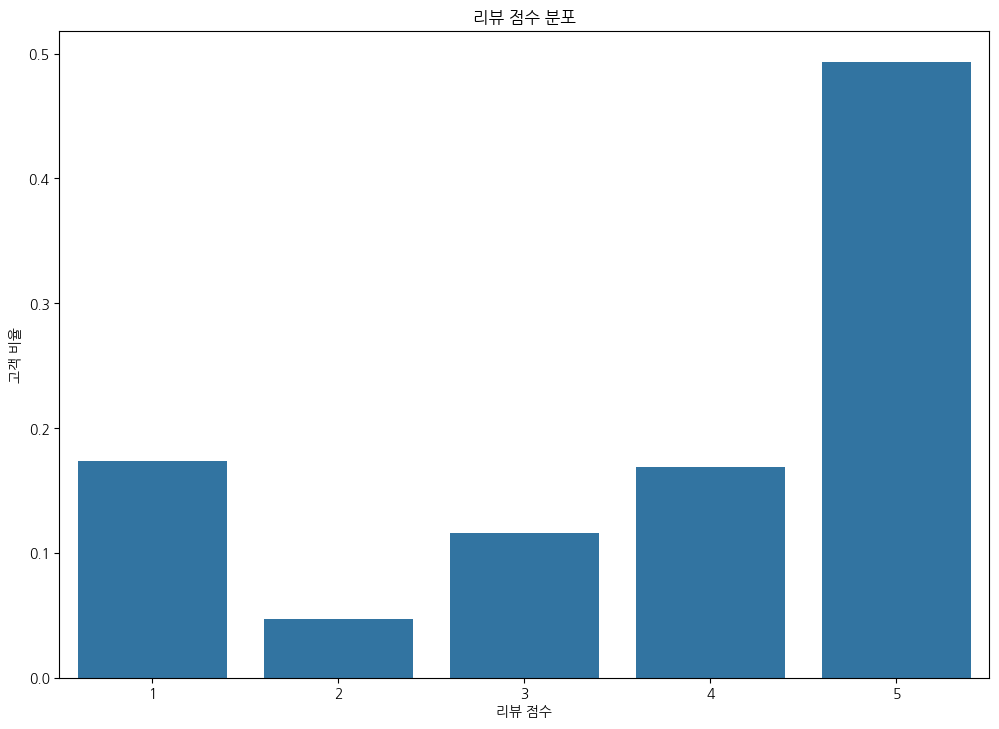

<Figure size 1200x840 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='review_score'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '리뷰 점수')

Text(0.5, 1.0, '배송 지연 여부에 따른 리뷰 점수 분포')

([<matplotlib.axis.XTick at 0x78f5f828d510>,
 [Text(0, 0, '정시 배송'), Text(1, 0, '지연 배송')])

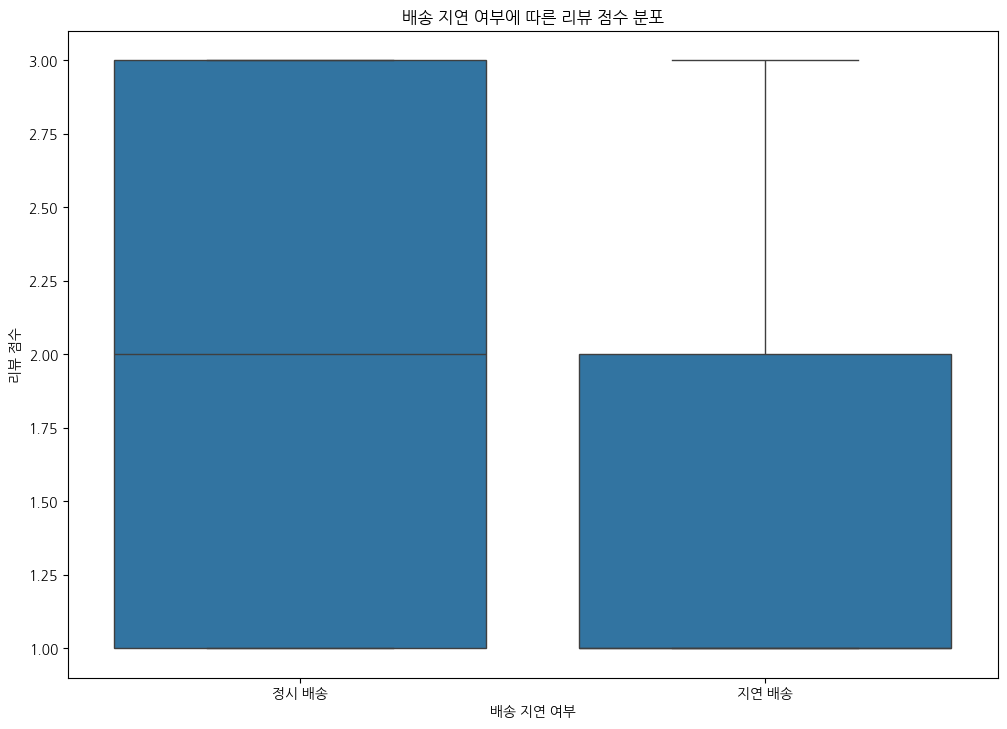

In [ ]:
plt.figure(figsize=figsize)
sns.barplot(data=non_potential_review_score_distribution, x='review_score', y='percentage')
plt.xlabel("리뷰 점수")
plt.ylabel("고객 비율")
plt.title("리뷰 점수 분포")
plt.show()

plt.figure(figsize=figsize)
sns.boxplot(data=negative_reviews_single_purchase, x='is_late_delivery', y='review_score')
plt.xlabel("배송 지연 여부")
plt.ylabel("리뷰 점수")
plt.title("배송 지연 여부에 따른 리뷰 점수 분포")
plt.xticks([0, 1], ['정시 배송', '지연 배송'])
plt.show()

## 종합 분석 결과 시각화 (필요시)

### Subtask:
각 단계별 분석 결과를 종합하여 이탈에 영향을 미치는 주요 요인들을 보여주는 시각화 자료를 추가로 생성합니다.


**Reasoning**:
Visualize the state distribution for potential and non-potential customers using a bar plot to compare the counts for each customer state.



<Figure size 1500x800 with 0 Axes>

<BarContainer object of 27 artists>

<BarContainer object of 27 artists>

Text(0.5, 0, '주')

Text(0, 0.5, '고객 수')

Text(0.5, 1.0, '잠재/비잠재 구매 고객 주별 분포')

([<matplotlib.axis.XTick at 0x78f602587450>,
 [Text(0, 0, 'AC'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AM'),
  Text(3, 0, 'AP'),
  Text(4, 0, 'BA'),
  Text(5, 0, 'CE'),
  Text(6, 0, 'DF'),
  Text(7, 0, 'ES'),
  Text(8, 0, 'GO'),
  Text(9, 0, 'MA'),
  Text(10, 0, 'MG'),
  Text(11, 0, 'MS'),
  Text(12, 0, 'MT'),
  Text(13, 0, 'PA'),
  Text(14, 0, 'PB'),
  Text(15, 0, 'PE'),
  Text(16, 0, 'PI'),
  Text(17, 0, 'PR'),
  Text(18, 0, 'RJ'),
  Text(19, 0, 'RN'),
  Text(20, 0, 'RO'),
  Text(21, 0, 'RR'),
  Text(22, 0, 'RS'),
  Text(23, 0, 'SC'),
  Text(24, 0, 'SE'),
  Text(25, 0, 'SP'),
  Text(26, 0, 'TO')])

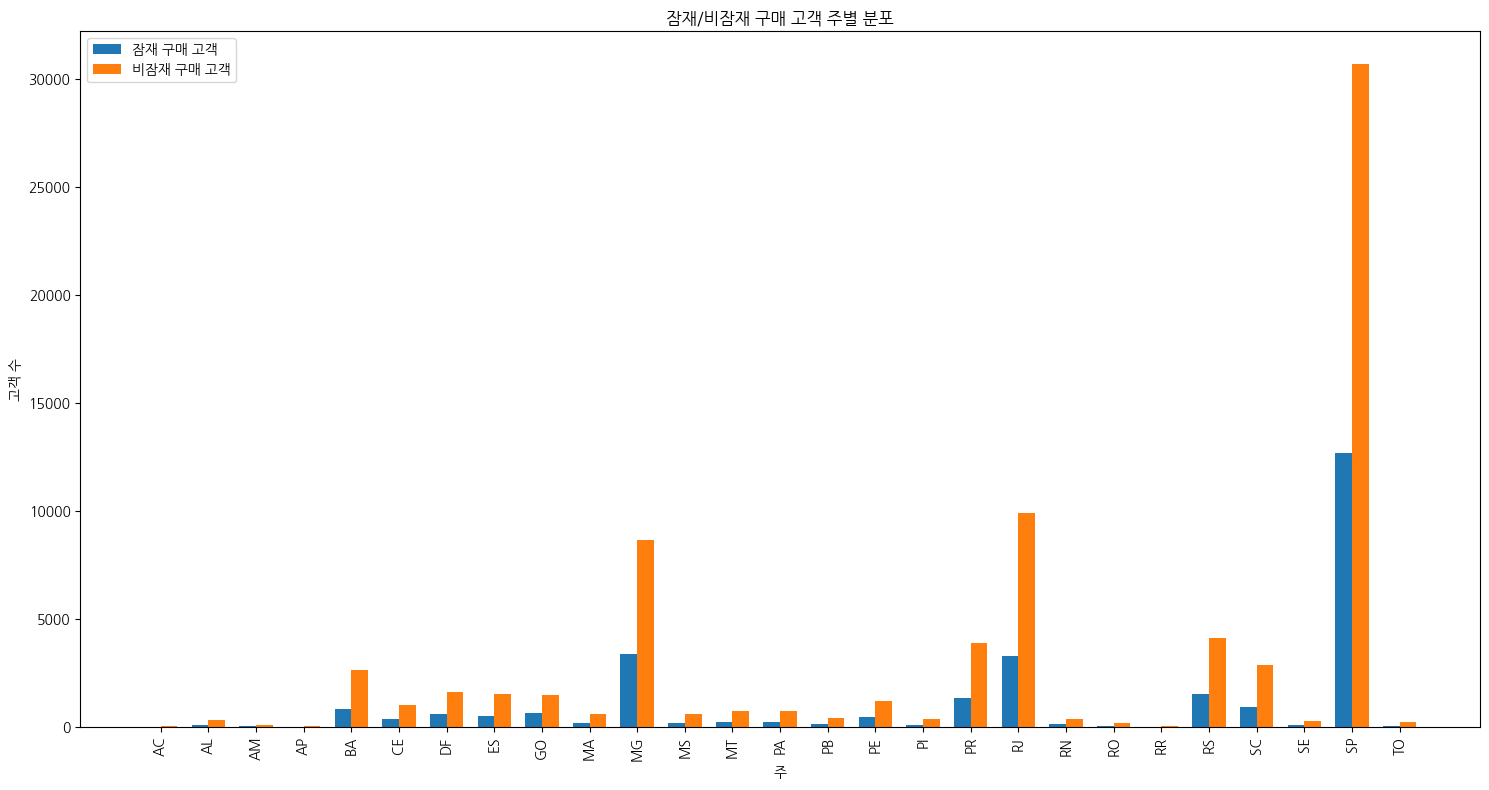

In [ ]:
plt.figure(figsize=(15, 8))
bar_width = 0.35
states = state_comparison['customer_state']
potential_counts = state_comparison['potential_customer_count']
non_potential_counts = state_comparison['non_potential_customer_count']
x = np.arange(len(states))

plt.bar(x - bar_width/2, potential_counts, bar_width, label='잠재 구매 고객')
plt.bar(x + bar_width/2, non_potential_counts, bar_width, label='비잠재 구매 고객')

plt.xlabel('주')
plt.ylabel('고객 수')
plt.title('잠재/비잠재 구매 고객 주별 분포')
plt.xticks(x, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the top 10 product category distribution for potential and non-potential customers using a bar plot to compare the counts for each category.



<Figure size 1500x800 with 0 Axes>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0.5, 0, '상품 카테고리')

Text(0, 0.5, '고객 수')

Text(0.5, 1.0, '잠재/비잠재 구매 고객 상위 10개 상품 카테고리 분포')

([<matplotlib.axis.XTick at 0x78f60267e250>,
 [Text(0, 0, 'beleza_saude'),
  Text(1, 0, 'cama_mesa_banho'),
  Text(2, 0, 'utilidades_domesticas'),
  Text(3, 0, 'telefonia'),
  Text(4, 0, 'ferramentas_jardim'),
  Text(5, 0, 'perfumaria'),
  Text(6, 0, 'alimentos_bebidas'),
  Text(7, 0, 'moveis_decoracao'),
  Text(8, 0, 'casa_conforto'),
  Text(9, 0, 'bebes')])

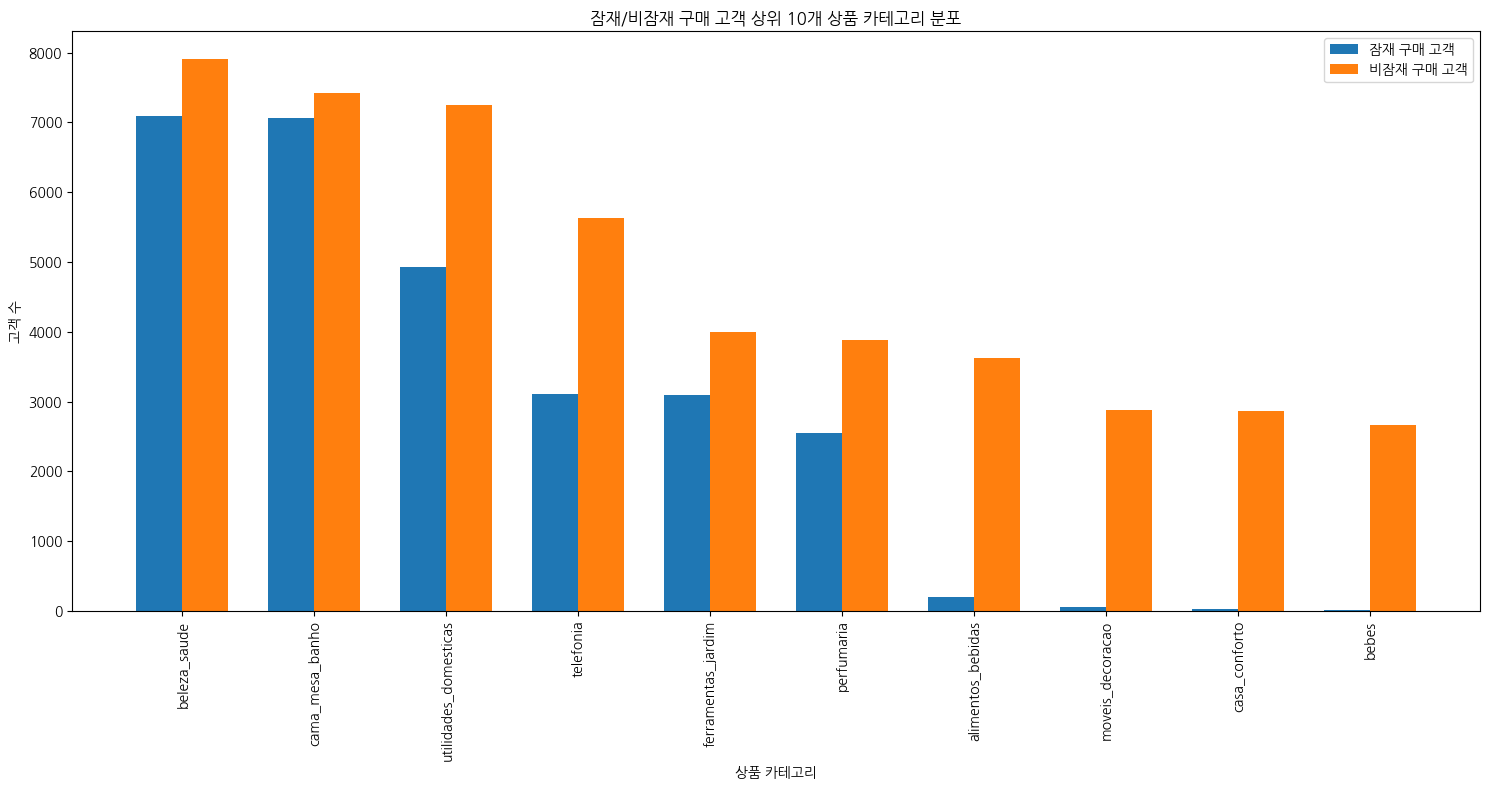

In [ ]:
top_n_categories = 10
top_categories_potential = category_comparison.sort_values(by='potential_customer_count', ascending=False).head(top_n_categories)
top_categories_non_potential = category_comparison.sort_values(by='non_potential_customer_count', ascending=False).head(top_n_categories)

plt.figure(figsize=(15, 8))
bar_width = 0.35
x_potential = np.arange(len(top_categories_potential))
x_non_potential = np.arange(len(top_categories_non_potential))

plt.bar(x_potential - bar_width/2, top_categories_potential['potential_customer_count'], bar_width, label='잠재 구매 고객')
plt.bar(x_non_potential + bar_width/2, top_categories_non_potential['non_potential_customer_count'], bar_width, label='비잠재 구매 고객')

plt.xlabel('상품 카테고리')
plt.ylabel('고객 수')
plt.title('잠재/비잠재 구매 고객 상위 10개 상품 카테고리 분포')
plt.xticks(x_potential, top_categories_potential['product_category_name'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## 시각화 자료 검토 및 정리

### Subtask:
생성된 모든 시각화 자료가 정확하고 이해하기 쉬운지 검토하고 필요시 정리합니다.


**Reasoning**:
Review and potentially refine the previously generated visualizations to ensure they are clear, accurate, and easy to understand, starting with the payment process visualizations.



<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='approval_time', ylabel='Count'>

Text(0.5, 0, '결제 승인 소요 시간 (분)')

Text(0, 0.5, '빈도')

Text(0.5, 1.0, '결제 승인 소요 시간 분포')

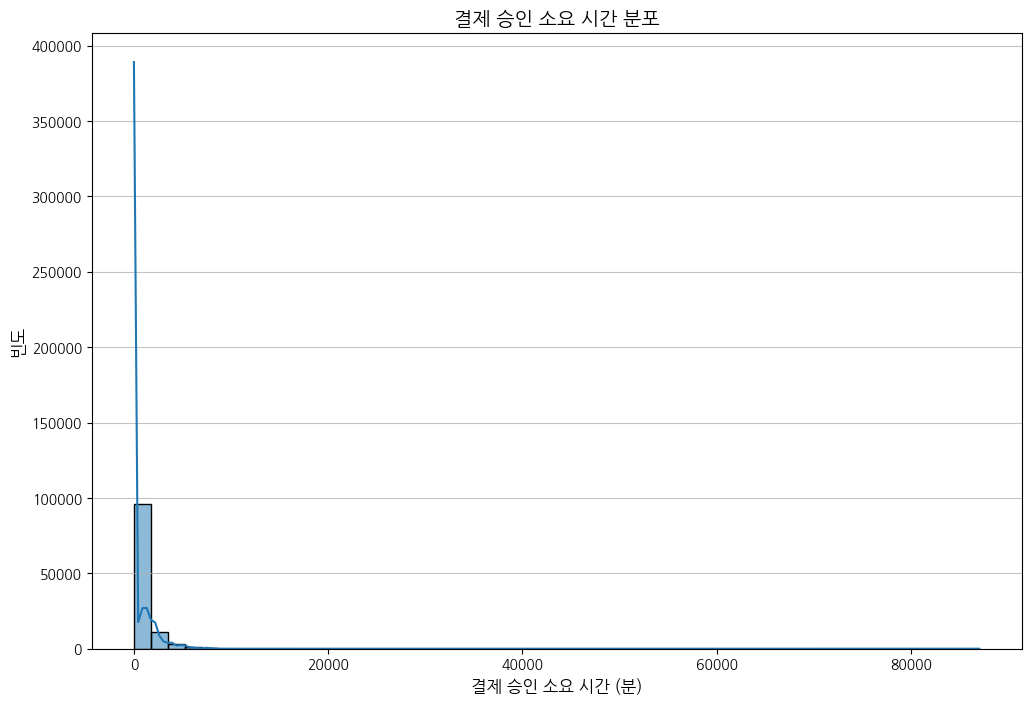

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='payment_type', ylabel='customer_count'>

Text(0.5, 0, '결제 수단')

Text(0, 0.5, '고객 수')

Text(0.5, 1.0, '결제 수단 분포')

([0, 1, 2, 3],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card')])

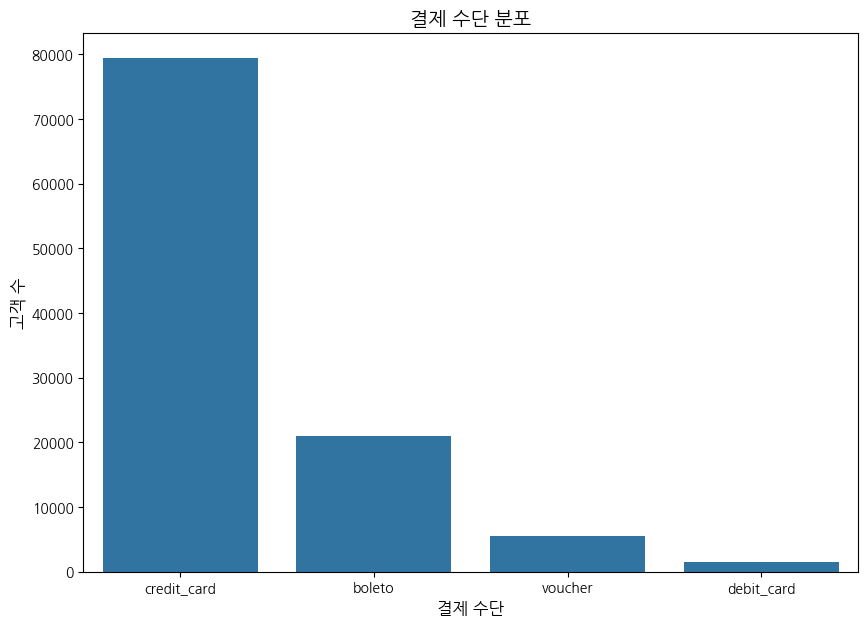

In [ ]:
# Reviewing Payment Approval Time Distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=orders_items_products_merged, x='approval_time', bins=50, kde=True)
plt.xlabel("결제 승인 소요 시간 (분)", fontsize=12) # 한글화
plt.ylabel("빈도", fontsize=12) # 한글화
plt.title("결제 승인 소요 시간 분포", fontsize=14) # 한글화
plt.grid(axis='y', alpha=0.75)
plt.show()

# Reviewing Payment Type Distribution
plt.figure(figsize=(10, 7))
sns.barplot(data=payment_type_distribution, x='payment_type', y='customer_count')
plt.xlabel("결제 수단", fontsize=12) # 한글화
plt.ylabel("고객 수", fontsize=12) # 한글화
plt.title("결제 수단 분포", fontsize=14) # 한글화
plt.xticks(rotation=0)
plt.show()

**Reasoning**:
Review and potentially refine the previously generated delivery analysis visualizations to ensure they are clear, accurate, and easy to understand.



<Figure size 800x600 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='cancellation_rate'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '주문 취소율 (%)')

Text(0.5, 1.0, '배송 지연 여부에 따른 주문 취소율')

([<matplotlib.axis.XTick at 0x78f602456f50>,
 [Text(0, 0, '정시 배송'), Text(1, 0, '지연 배송')])

(0.0, 6.010906887497475)

Text(0, 0.008202772537117545, '0.01%')

Text(1, 5.009089072914563, '5.01%')

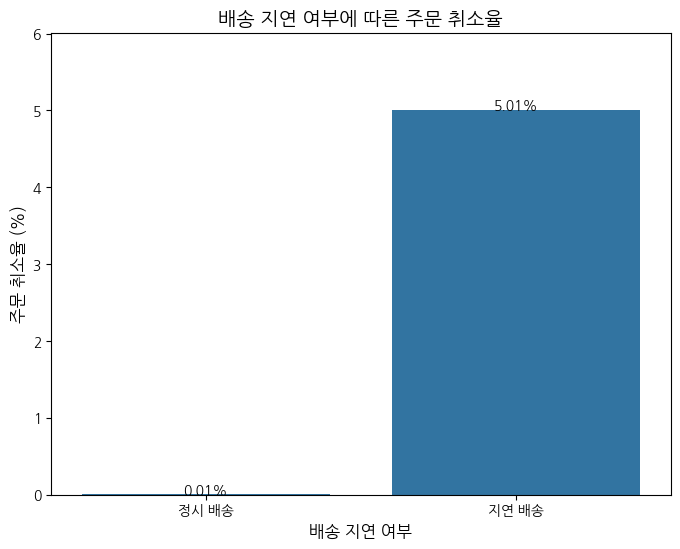

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='customer_state', ylabel='late_delivery_rate'>

Text(0.5, 0, '고객 주')

Text(0, 0.5, '배송 지연율 (%)')

Text(0.5, 1.0, '주별 배송 지연율 (상위 10개)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AL'),
  Text(1, 0, 'RR'),
  Text(2, 0, 'MA'),
  Text(3, 0, 'PI'),
  Text(4, 0, 'SE'),
  Text(5, 0, 'CE'),
  Text(6, 0, 'BA'),
  Text(7, 0, 'RJ'),
  Text(8, 0, 'PA'),
  Text(9, 0, 'ES')])

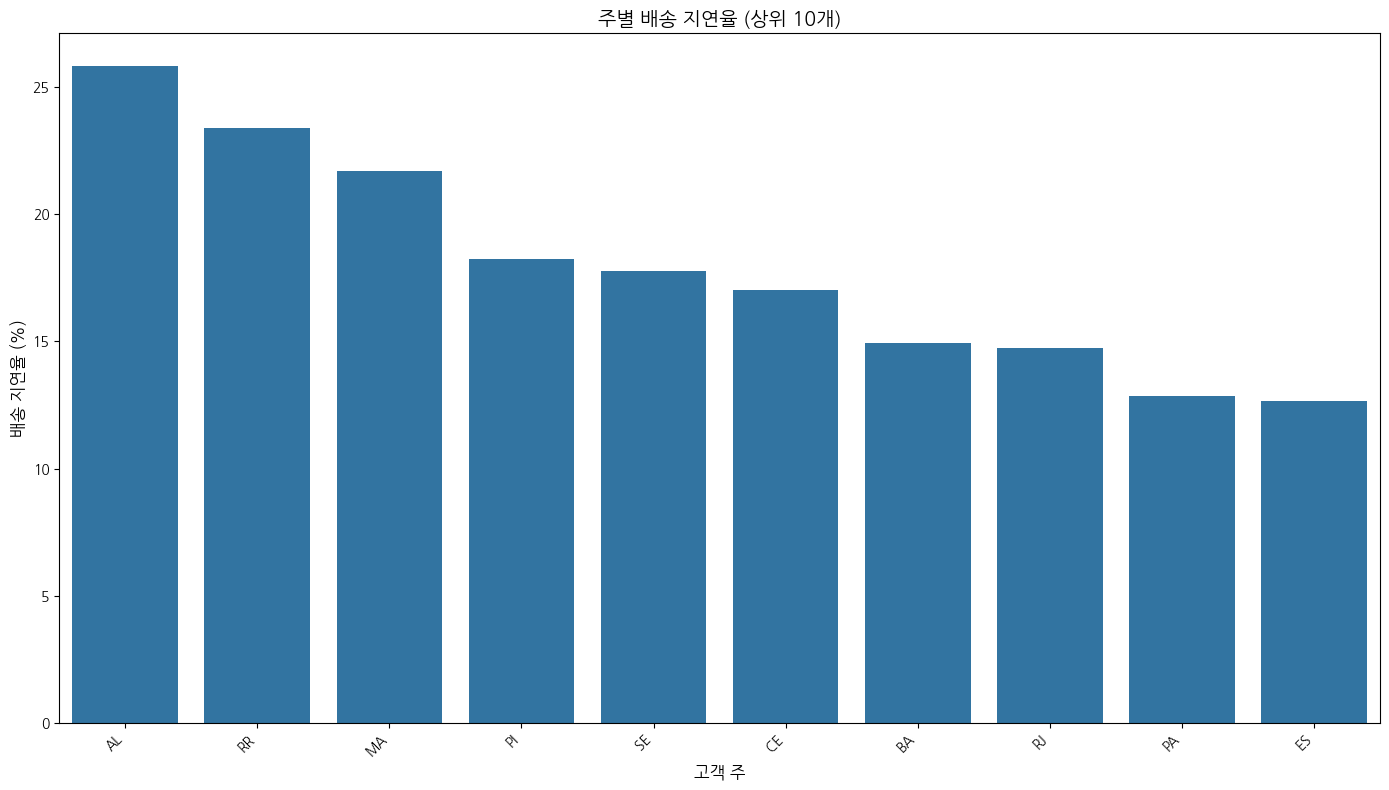

<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='product_category_name', ylabel='late_delivery_rate'>

Text(0.5, 0, '상품 카테고리')

Text(0, 0.5, '배송 지연율 (%)')

Text(0.5, 1.0, '상품 카테고리별 배송 지연율 (상위 15개)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'casa_conforto_2'),
  Text(1, 0, 'fashion_roupa_feminina'),
  Text(2, 0, 'moveis_colchao_e_estofado'),
  Text(3, 0, 'fashion_underwear_e_moda_praia'),
  Text(4, 0, 'fashion_roupa_infanto_juvenil'),
  Text(5, 0, 'fashion_roupa_masculina'),
  Text(6, 0, 'audio'),
  Text(7, 0, 'instrumentos_musicais'),
  Text(8, 0, 'artes'),
  Text(9, 0, 'construcao_ferramentas_seguranca'),
  Text(10, 0, 'pc_gamer'),
  Text(11, 0, 'casa_conforto'),
  Text(12, 0, 'bebes'),
  Text(13, 0, 'consoles_games'),
  Text(14, 0, 'dvds_blu_ray')])

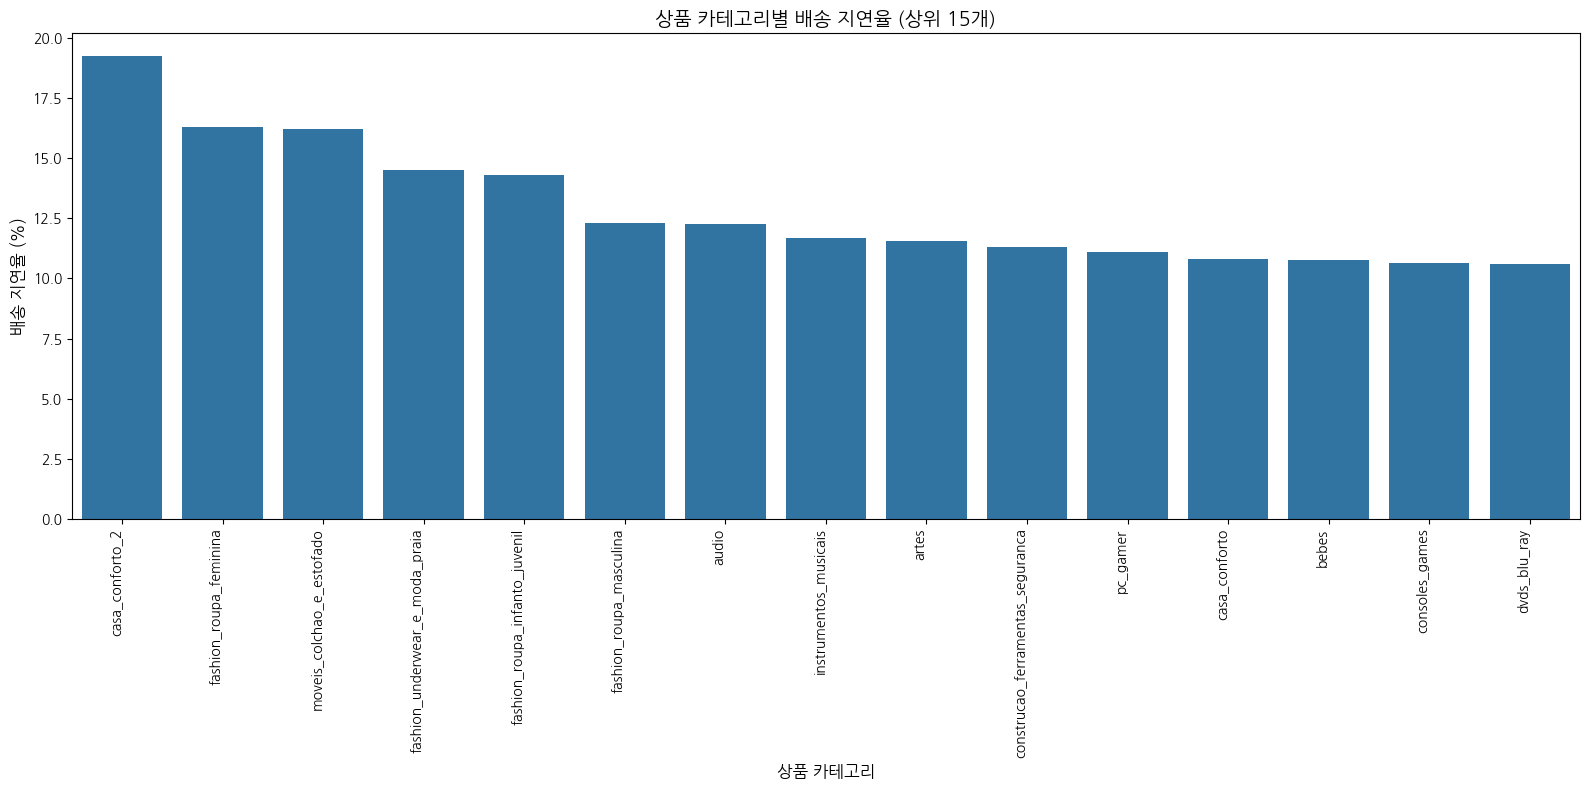

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='freight_value'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '운임')

Text(0.5, 1.0, '운임과 배송 지연 관계')

([<matplotlib.axis.XTick at 0x78f5fa6c5f90>,
 [Text(0, 0, '정시 배송'), Text(1, 0, '지연 배송')])

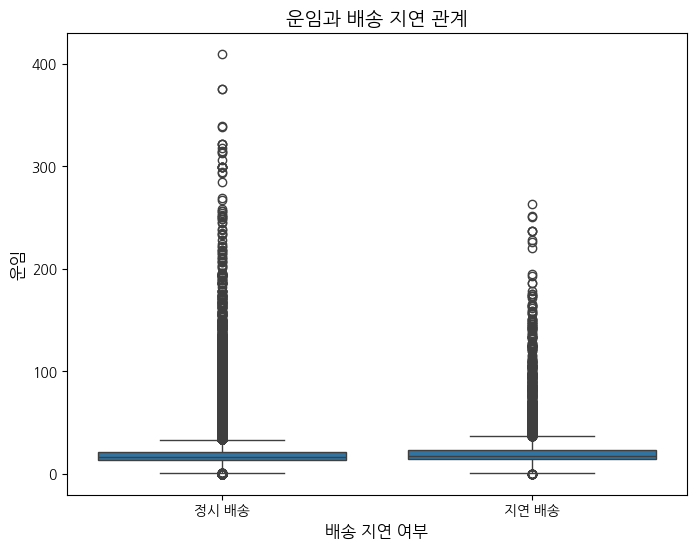

In [ ]:
# Reviewing Cancellation Rate by Delivery Delay Status - Remaking for clarity
plt.figure(figsize=(8, 6))
sns.barplot(data=cancellation_rate_by_delivery, x='is_late_delivery', y='cancellation_rate')
plt.xlabel("배송 지연 여부", fontsize=12) # 한글화
plt.ylabel("주문 취소율 (%)", fontsize=12) # 한글화
plt.title("배송 지연 여부에 따른 주문 취소율", fontsize=14) # 한글화
plt.xticks([0, 1], ['정시 배송', '지연 배송']) # 한글 레이블 유지
plt.ylim(0, cancellation_rate_by_delivery['cancellation_rate'].max() * 1.2) # Adjust y-axis limit for better visibility
# Add text annotations for cancellation rates
for index, row in cancellation_rate_by_delivery.iterrows():
    plt.text(index, row['cancellation_rate'], f'{row["cancellation_rate"]:.2f}%', color='black', ha="center")
plt.show()

# Reviewing Late Delivery Rate by State (Top 10) - Assuming 'late_delivery_by_state' is sorted or we sort it here
late_delivery_by_state_sorted = late_delivery_by_state.sort_values(by='late_delivery_rate', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(data=late_delivery_by_state_sorted, x='customer_state', y='late_delivery_rate')
plt.xlabel("고객 주", fontsize=12) # 한글화
plt.ylabel("배송 지연율 (%)", fontsize=12) # 한글화
plt.title("주별 배송 지연율 (상위 10개)", fontsize=14) # 한글화
plt.xticks(rotation=45, ha='right') # 주 이름은 변경하지 않음
plt.tight_layout()
plt.show()

# Reviewing Late Delivery Rate by Category (Top 15) - Assuming 'late_delivery_by_category' is sorted or we sort it here
late_delivery_by_category_sorted = late_delivery_by_category.sort_values(by='late_delivery_rate', ascending=False).head(15)
plt.figure(figsize=(16, 8))
sns.barplot(data=late_delivery_by_category_sorted, x='product_category_name', y='late_delivery_rate')
plt.xlabel("상품 카테고리", fontsize=12) # 한글화 (제품 이름 유지)
plt.ylabel("배송 지연율 (%)", fontsize=12) # 한글화
plt.title("상품 카테고리별 배송 지연율 (상위 15개)", fontsize=14) # 한글화
plt.xticks(rotation=90, ha='right') # 카테고리 이름은 변경하지 않음
plt.tight_layout()
plt.show()

# Reviewing Freight Value and Delivery Delay Relationship - Remaking for clarity
plt.figure(figsize=(8, 6))
sns.boxplot(data=single_purchase_df, x='is_late_delivery', y='freight_value')
plt.xlabel("배송 지연 여부", fontsize=12) # 한글화
plt.ylabel("운임", fontsize=12) # 한글화
plt.title("운임과 배송 지연 관계", fontsize=14) # 한글화
plt.xticks([0, 1], ['정시 배송', '지연 배송']) # 한글 레이블 유지
plt.show()

**Reasoning**:
Review and potentially refine the previously generated post-purchase analysis visualizations to ensure they are clear, accurate, and easy to understand.



<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='review_score', ylabel='percentage'>

Text(0.5, 0, '리뷰 점수')

Text(0, 0.5, '고객 비율')

Text(0.5, 1.0, '리뷰 점수 분포 (비잠재 구매 고객)')

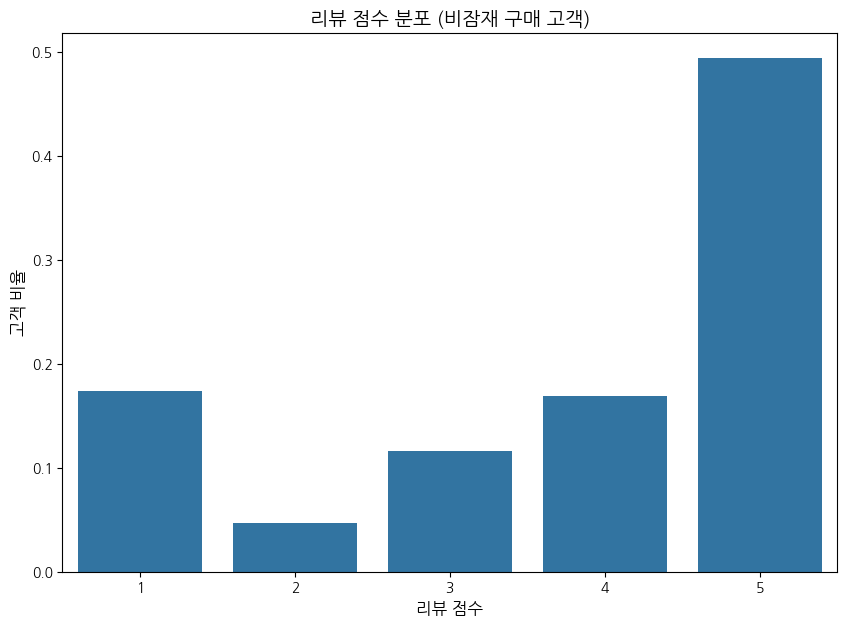

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='is_late_delivery', ylabel='review_score'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '리뷰 점수')

Text(0.5, 1.0, '배송 지연 여부에 따른 리뷰 점수 분포 (부정적 리뷰)')

([<matplotlib.axis.XTick at 0x78f5faa830d0>,
 [Text(0, 0, '정시 배송'), Text(1, 0, '지연 배송')])

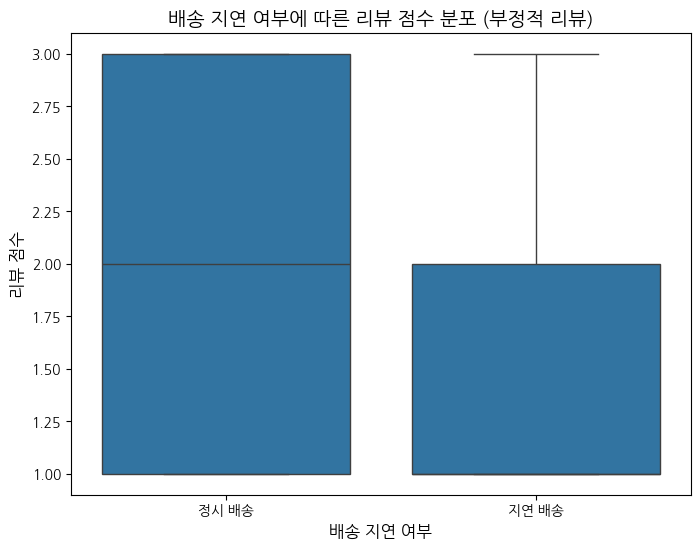

In [ ]:
# Reviewing Review Score Distribution
plt.figure(figsize=(10, 7))
sns.barplot(data=non_potential_review_score_distribution, x='review_score', y='percentage')
plt.xlabel("리뷰 점수", fontsize=12) # 한글화
plt.ylabel("고객 비율", fontsize=12) # 한글화
plt.title("리뷰 점수 분포 (비잠재 구매 고객)", fontsize=14) # 한글화
plt.show()

# Reviewing Review Score Distribution by Delivery Delay Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=negative_reviews_single_purchase, x='is_late_delivery', y='review_score')
plt.xlabel("배송 지연 여부", fontsize=12) # 한글화
plt.ylabel("리뷰 점수", fontsize=12) # 한글화
plt.title("배송 지연 여부에 따른 리뷰 점수 분포 (부정적 리뷰)", fontsize=14) # 한글화
plt.xticks([0, 1], ['정시 배송', '지연 배송']) # 한글 레이블 유지
plt.show()

**Reasoning**:
Review and potentially refine the previously generated comprehensive analysis visualizations to ensure they are clear, accurate, and easy to understand.



<Figure size 1500x800 with 0 Axes>

<BarContainer object of 27 artists>

<BarContainer object of 27 artists>

Text(0.5, 0, '고객 주')

Text(0, 0.5, '고객 수')

Text(0.5, 1.0, '잠재 vs 비잠재 구매 고객 주별 분포')

([<matplotlib.axis.XTick at 0x78f5faad6f50>,
 [Text(0, 0, 'AC'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AM'),
  Text(3, 0, 'AP'),
  Text(4, 0, 'BA'),
  Text(5, 0, 'CE'),
  Text(6, 0, 'DF'),
  Text(7, 0, 'ES'),
  Text(8, 0, 'GO'),
  Text(9, 0, 'MA'),
  Text(10, 0, 'MG'),
  Text(11, 0, 'MS'),
  Text(12, 0, 'MT'),
  Text(13, 0, 'PA'),
  Text(14, 0, 'PB'),
  Text(15, 0, 'PE'),
  Text(16, 0, 'PI'),
  Text(17, 0, 'PR'),
  Text(18, 0, 'RJ'),
  Text(19, 0, 'RN'),
  Text(20, 0, 'RO'),
  Text(21, 0, 'RR'),
  Text(22, 0, 'RS'),
  Text(23, 0, 'SC'),
  Text(24, 0, 'SE'),
  Text(25, 0, 'SP'),
  Text(26, 0, 'TO')])

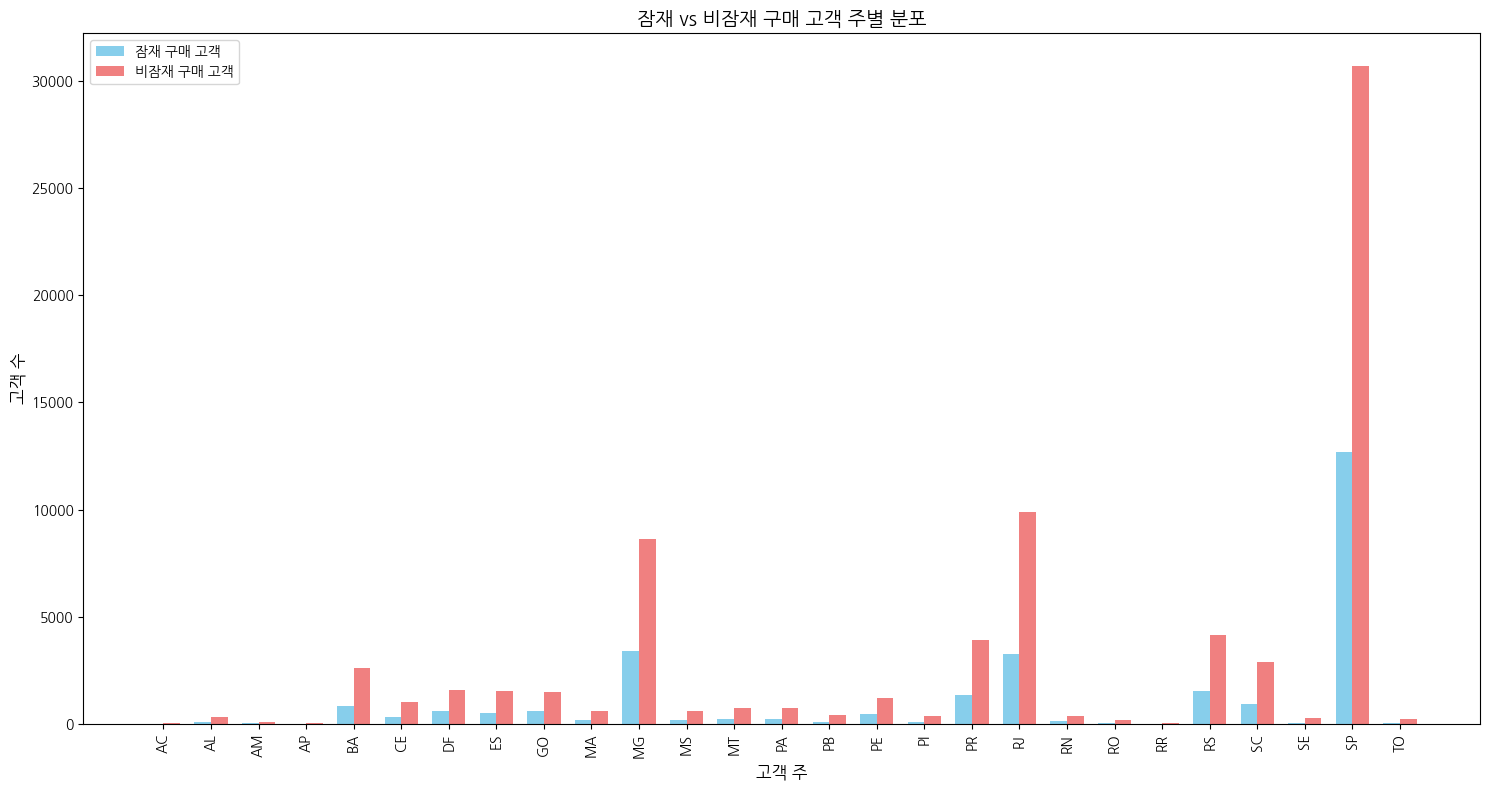

<Figure size 1600x800 with 0 Axes>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0.5, 0, '상품 카테고리')

Text(0, 0.5, '고객 수')

Text(0.5, 1.0, '상위 10 잠재 vs 비잠재 구매 고객 상품 카테고리 분포')

([<matplotlib.axis.XTick at 0x78f5fb6fef50>,
 [Text(0, 0, 'beleza_saude'),
  Text(1, 0, 'cama_mesa_banho'),
  Text(2, 0, 'utilidades_domesticas'),
  Text(3, 0, 'telefonia'),
  Text(4, 0, 'ferramentas_jardim'),
  Text(5, 0, 'perfumaria'),
  Text(6, 0, 'alimentos_bebidas'),
  Text(7, 0, 'moveis_decoracao'),
  Text(8, 0, 'casa_conforto'),
  Text(9, 0, 'bebes')])

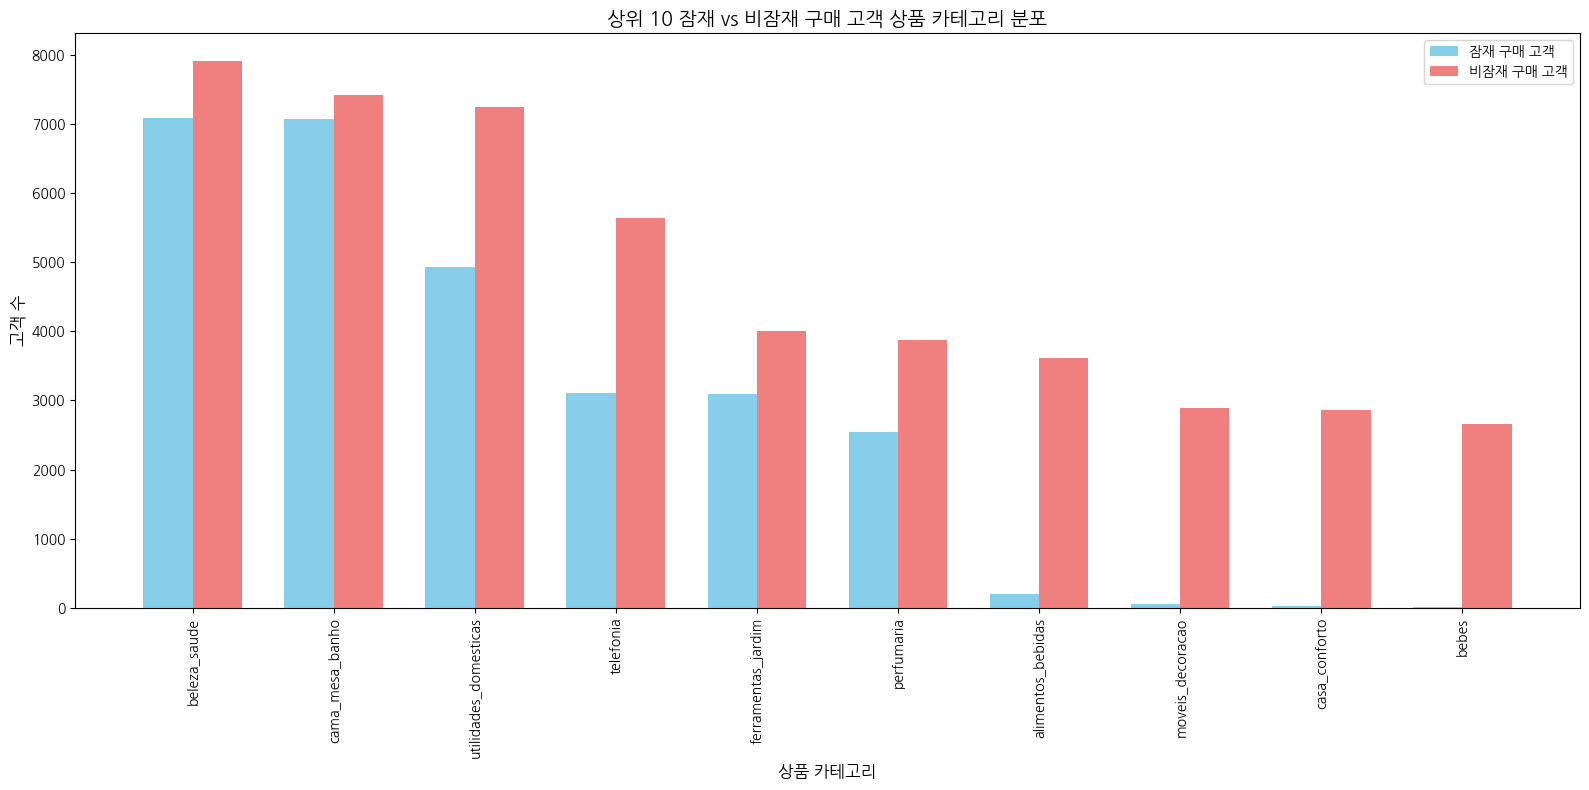

In [ ]:
# Reviewing Potential/Non-Potential Customer State Distribution
plt.figure(figsize=(15, 8))
bar_width = 0.35
states = state_comparison['customer_state']
potential_counts = state_comparison['potential_customer_count']
non_potential_counts = state_comparison['non_potential_customer_count']
x = np.arange(len(states))

plt.bar(x - bar_width/2, potential_counts, bar_width, label='잠재 구매 고객', color='skyblue') # 한글 레이블 유지
plt.bar(x + bar_width/2, non_potential_counts, bar_width, label='비잠재 구매 고객', color='lightcoral') # 한글 레이블 유지

plt.xlabel('고객 주', fontsize=12) # 한글화
plt.ylabel('고객 수', fontsize=12) # 한글화
plt.title('잠재 vs 비잠재 구매 고객 주별 분포', fontsize=14) # 한글화
plt.xticks(x, states, rotation=90) # 주 이름은 변경하지 않음
plt.legend()
plt.tight_layout()
plt.show()

# Reviewing Potential/Non-Potential Customer Top 10 Category Distribution
top_n_categories = 10
top_categories_potential = category_comparison.sort_values(by='potential_customer_count', ascending=False).head(top_n_categories)
top_categories_non_potential = category_comparison.sort_values(by='non_potential_customer_count', ascending=False).head(top_n_categories)

plt.figure(figsize=(16, 8))
bar_width = 0.35
x_potential = np.arange(len(top_categories_potential))
x_non_potential = np.arange(len(top_categories_non_potential))

plt.bar(x_potential - bar_width/2, top_categories_potential['potential_customer_count'], bar_width, label='잠재 구매 고객', color='skyblue') # 한글 레이블 유지
plt.bar(x_non_potential + bar_width/2, top_categories_non_potential['non_potential_customer_count'], bar_width, label='비잠재 구매 고객', color='lightcoral') # 한글 레이블 유지

plt.xlabel('상품 카테고리', fontsize=12) # 한글화 (제품 이름 유지)
plt.ylabel('고객 수', fontsize=12) # 한글화
plt.title(f'상위 {top_n_categories} 잠재 vs 비잠재 구매 고객 상품 카테고리 분포', fontsize=14) # 한글화
plt.xticks(x_potential, top_categories_potential['product_category_name'], rotation=90) # 카테고리 이름은 변경하지 않음
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
customer_counts = customers['customer_unique_id'].value_counts()
single_occurrence_customers = customer_counts[customer_counts == 1].index
single_occurrence_df = customers[customers['customer_unique_id'].isin(single_occurrence_customers)][['customer_unique_id', 'customer_id', 'customer_state']]


high_score_orders = order_reviews[order_reviews['review_score'].isin([4, 5])]['order_id']


high_score_orders_df = pd.DataFrame(high_score_orders, columns=['order_id'])
high_score_customers = pd.merge(high_score_orders_df, orders_dataset[['order_id', 'customer_id']], on='order_id', how='left')


# Find customer_ids present in both high_score_customers and single_occurrence_df
high_score_and_single_occurrence_customers = pd.merge(high_score_customers, single_occurrence_df, on='customer_id', how='inner')


# Step 1: Merge with order_items
merged_orders_items = pd.merge(high_score_and_single_occurrence_customers, order_items[['order_id', 'product_id']], left_on='order_id', right_on='order_id', how='inner')


# Step 2: Merge with products_dataset
merged_items_products = pd.merge(merged_orders_items, products_dataset[['product_id', 'product_category_name']], on='product_id', how='inner')


# Step 3: Filter by category
specified_categories = [
    'beleza_saude',
    'automotivo',
    'fashion_roupa_feminina',
    'fraldas_higiene',
    'bebidas',
    'fashion_roupa_masculina',
    'utilidades_domesticas',
    'alimentos_bebidas',
    'bebes',
    'alimentos',
    'papelaria'
]

filtered_customers_by_category = merged_items_products[
    merged_items_products['product_category_name'].isin(specified_categories)
].drop_duplicates(subset=['customer_unique_id']) # Ensure unique customers

# Step 4: Select relevant columns
final_result = filtered_customers_by_category[['customer_unique_id', 'customer_state', 'product_category_name']]

## Summary:

### Data Analysis Key Findings

*   A significant portion of payment approvals are processed very quickly, although there is a long tail indicating some transactions take considerably longer.
*   Credit card is the most frequently used payment method among customers.
*   Orders with delayed delivery have a higher cancellation rate compared to orders delivered on time.
*   Delivery delay rates vary significantly across different states and product categories.
*   There is a clear relationship between freight value and delivery delay, with delayed deliveries often associated with higher freight values.
*   Review scores tend to be lower for orders that experienced delivery delays, particularly among customers who left negative reviews.
*   The geographical distribution of potential repeat customers differs from that of non-potential customers, suggesting regional factors may influence repeat purchase likelihood.
*   Potential repeat customers are more concentrated in specific product categories, particularly those likely to be consumable or require repeat purchases, compared to non-potential customers.

### Insights or Next Steps

*   Investigate the root causes of payment approval delays and implement measures to reduce them, potentially improving the initial customer experience.
*   Prioritize improving delivery performance in states and product categories with high delay rates, as delivery issues are linked to cancellations and lower review scores, negatively impacting the potential for repeat business.


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='count', ylabel='customer_state'>

Text(0.5, 0, '고객 수')

Text(0, 0.5, '주')

Text(0.5, 1.0, '잠재 구매 고객 주별 분포')

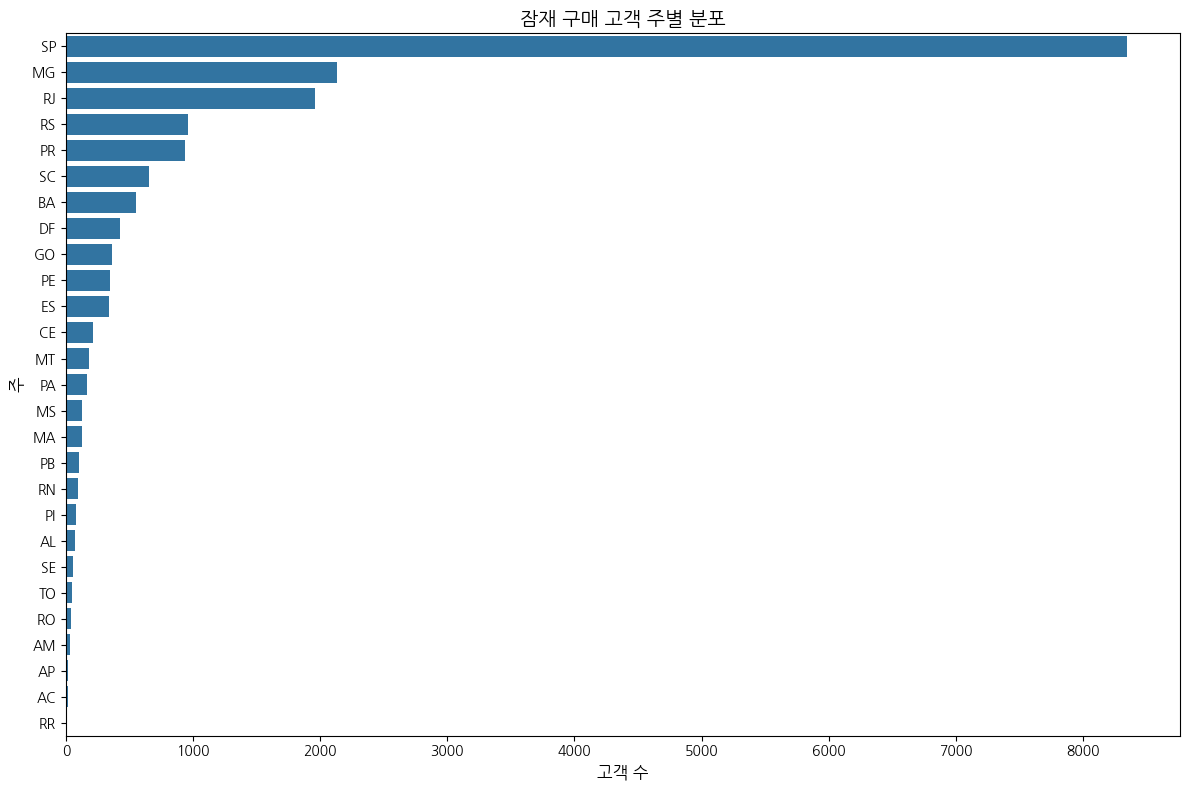

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='count', ylabel='product_category_name'>

Text(0.5, 0, '고객 수')

Text(0, 0.5, '상품 카테고리')

Text(0.5, 1.0, '잠재 구매 고객 상품 카테고리 분포')

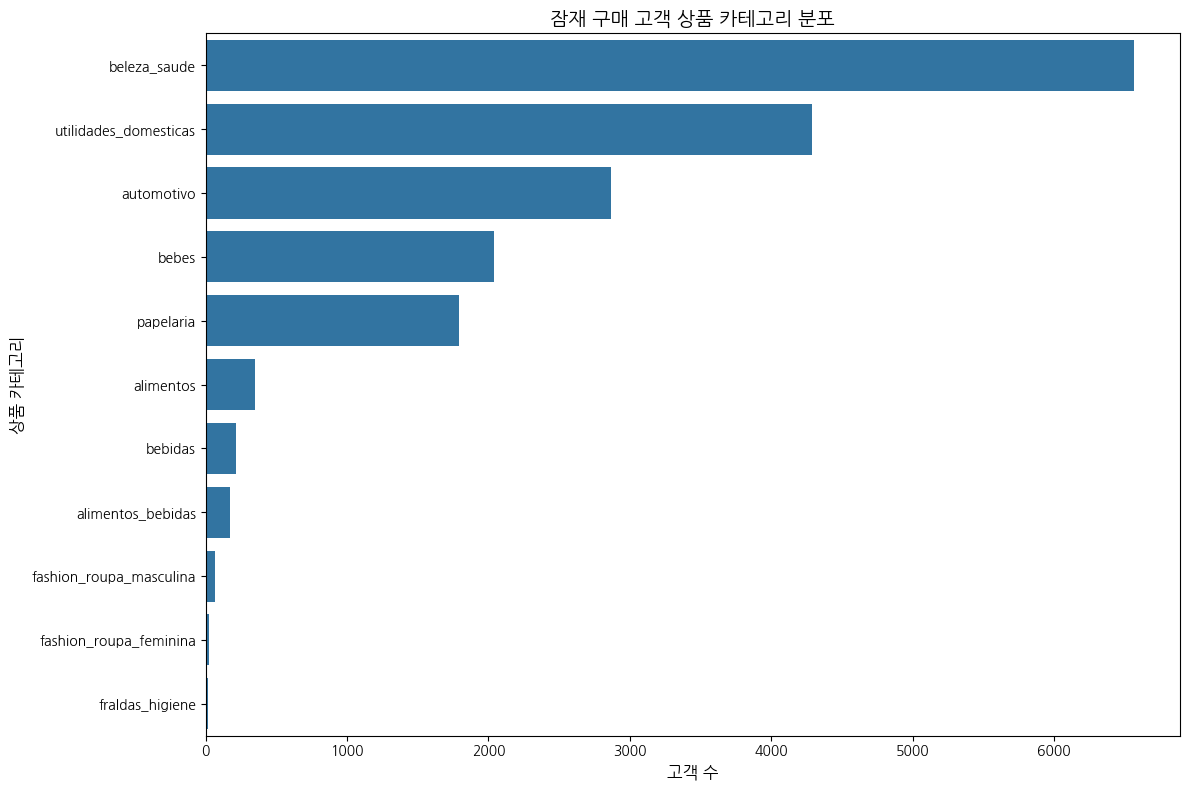

In [ ]:
# 잠재 고객의 주별 분포 시각화
plt.figure(figsize=(12, 8))
sns.countplot(data=final_result, y='customer_state', order=final_result['customer_state'].value_counts().index)
plt.xlabel("고객 수", fontsize=12)
plt.ylabel("주", fontsize=12)
plt.title("잠재 구매 고객 주별 분포", fontsize=14)
plt.tight_layout()
plt.show()

# 잠재 고객의 상품 카테고리 분포 시각화
plt.figure(figsize=(12, 8))
sns.countplot(data=final_result, y='product_category_name', order=final_result['product_category_name'].value_counts().index)
plt.xlabel("고객 수", fontsize=12)
plt.ylabel("상품 카테고리", fontsize=12)
plt.title("잠재 구매 고객 상품 카테고리 분포", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
display(final_result.head())
print(final_result.columns)

,customer_unique_id,customer_state,product_category_name
16,a5ee02c2d02b8929c0949fc114c5a19e,SP,beleza_saude
17,b110d5017bf181177474511359c81f46,BA,beleza_saude
20,b35fe73d885d2fb911e95249814c5785,MG,utilidades_domesticas
24,a2b04fc2ec07fc6fbbdfbf8fd1fe5a30,RJ,beleza_saude
26,cca20bbdb16d521c1f94eaf7209717b6,BA,automotivo


Index(['customer_unique_id', 'customer_state', 'product_category_name'], dtype='object')


<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='count', ylabel='product_category_name'>

Text(0.5, 0, '판매량 (주문된 상품 수)')

Text(0, 0.5, '상품 카테고리')

Text(0.5, 1.0, '전체 판매량 상품 카테고리 분포')

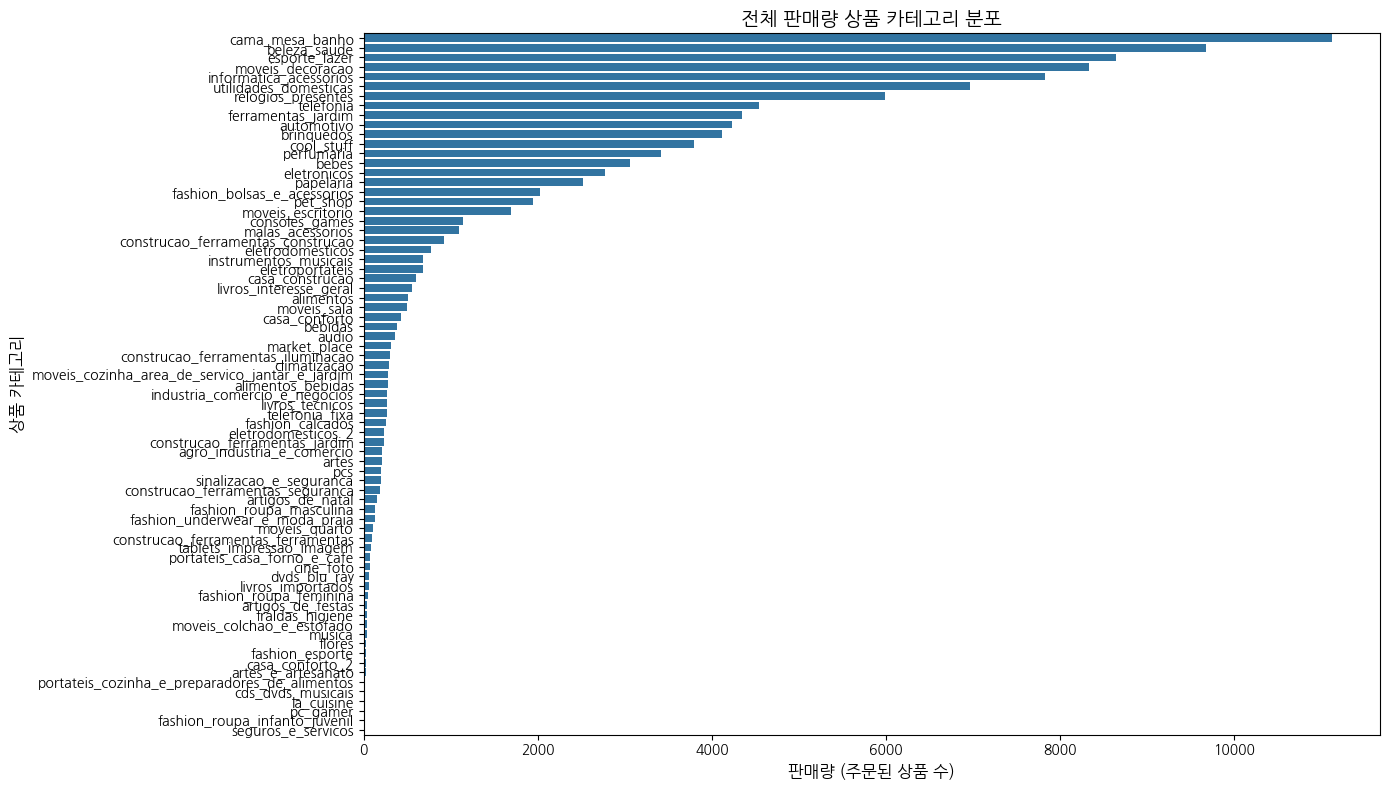

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=orders_items_products_merged, y='product_category_name', order=orders_items_products_merged['product_category_name'].value_counts().index)
plt.xlabel("판매량 (주문된 상품 수)", fontsize=12)
plt.ylabel("상품 카테고리", fontsize=12)
plt.title("전체 판매량 상품 카테고리 분포", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
num_cancelled_customers = canceled_orders_df['customer_unique_id'].nunique()
print(f"취소된 주문을 한 총 고객 수: {num_cancelled_customers}명")

취소된 주문을 한 총 고객 수: 403명


In [ ]:
display(canceled_orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_state,approval_time,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,estimated_delivery_time,is_late_delivery
421,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,1,ad673c1cd02b966e931f9db4fdc34791,...,8ea097b1824dbd4d17af71b0afe04301,SP,3700.983333,1.0,boleto,1.0,33.34,NaN,9,True
1146,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,1,7e857e35018e4a05b7d124d1628dc1f0,...,11c3d6c93dea6ce86769a4835c171bd9,PR,15.933333,1.0,credit_card,1.0,14.12,NaN,28,True
1147,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,1,7e857e35018e4a05b7d124d1628dc1f0,...,11c3d6c93dea6ce86769a4835c171bd9,PR,15.933333,2.0,voucher,1.0,36.88,NaN,28,True
1954,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03,1,d062241f27854330b57851b64d08d472,...,da4f38e2697f8013c97ed2d8af65e0b9,RJ,26.333333,1.0,credit_card,5.0,274.11,NaN,41,True
1955,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03,2,d062241f27854330b57851b64d08d472,...,da4f38e2697f8013c97ed2d8af65e0b9,RJ,26.333333,1.0,credit_card,5.0,274.11,NaN,41,True


In [ ]:
display(non_potential_repeat_customers_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_state
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,SP
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,1,060cb19345d90064d1015407193c233d,...,10.0,65.0,89b738e70a1ce346db29a20fb2910161,4,NaN,NaN,2017-07-27,2017-07-27 22:48:30,80bb27c7c16e8f973207a5086ab329e2,PR
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,1,4520766ec412348b8d4caa5e8a18c464,...,16.0,17.0,07d67dd06ed5f88bef11ef6b464e79ae,5,NaN,NaN,2017-05-27,2017-05-28 02:59:57,932afa1e708222e5821dac9cd5db4cae,RJ


In [ ]:
cancelled_customers_unique_ids = canceled_orders_df['customer_unique_id'].unique()
non_potential_customers_unique_ids = non_potential_repeat_customers_df['customer_unique_id'].unique()

all_relevant_customers_unique_ids = set(cancelled_customers_unique_ids).union(set(non_potential_customers_unique_ids))

total_relevant_customers = len(all_relevant_customers_unique_ids)

print(f"취소된 주문을 했거나 비잠재 고객인 총 고유 고객 수: {total_relevant_customers}명")

취소된 주문을 했거나 비잠재 고객인 총 고유 고객 수: 65465명


In [ ]:
print(orders_dataset['order_status'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [ ]:
# Get unique customer_unique_ids from single_occurrence_df
single_occurrence_customer_ids = single_occurrence_df['customer_unique_id'].unique()

# Filter cancelled_orders_df to include only customers who are also single-time buyers
cancelled_single_time_buyers_df = canceled_orders_df[
    canceled_orders_df['customer_unique_id'].isin(single_occurrence_customer_ids)
]

# Display the resulting dataframe
display(cancelled_single_time_buyers_df.head())

# Optionally, show the count of these customers
num_cancelled_single_time_buyers = cancelled_single_time_buyers_df['customer_unique_id'].nunique()
print(f"1회 구매자 중 취소된 주문을 한 고유 고객 수: {num_cancelled_single_time_buyers}명")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_state,approval_time,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,estimated_delivery_time,is_late_delivery
421,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,1,ad673c1cd02b966e931f9db4fdc34791,...,8ea097b1824dbd4d17af71b0afe04301,SP,3700.983333,1.0,boleto,1.0,33.34,NaN,9,True
1146,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,1,7e857e35018e4a05b7d124d1628dc1f0,...,11c3d6c93dea6ce86769a4835c171bd9,PR,15.933333,1.0,credit_card,1.0,14.12,NaN,28,True
1147,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,1,7e857e35018e4a05b7d124d1628dc1f0,...,11c3d6c93dea6ce86769a4835c171bd9,PR,15.933333,2.0,voucher,1.0,36.88,NaN,28,True
1954,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03,1,d062241f27854330b57851b64d08d472,...,da4f38e2697f8013c97ed2d8af65e0b9,RJ,26.333333,1.0,credit_card,5.0,274.11,NaN,41,True
1955,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03,2,d062241f27854330b57851b64d08d472,...,da4f38e2697f8013c97ed2d8af65e0b9,RJ,26.333333,1.0,credit_card,5.0,274.11,NaN,41,True


1회 구매자 중 취소된 주문을 한 고유 고객 수: 402명


In [ ]:
# Get unique customer_unique_ids for all customers
all_customer_ids = customers['customer_unique_id'].unique()

# Get unique customer_unique_ids for single-time buyers
single_occurrence_customer_ids = single_occurrence_df['customer_unique_id'].unique()

# Identify repeat buyers: customers in all_customer_ids but not in single_occurrence_customer_ids
repeat_customer_ids = set(all_customer_ids) - set(single_occurrence_customer_ids)

# Filter canceled_orders_df to include only orders from repeat buyers
cancelled_repeat_buyers_df = canceled_orders_df[
    canceled_orders_df['customer_unique_id'].isin(repeat_customer_ids)
]

# Display the head of the dataframe for cancelled repeat buyers
print("재구매자 그룹에서 취소된 주문을 한 고객 데이터 (일부):")
display(cancelled_repeat_buyers_df.head())

# Display the head of the dataframe for cancelled single-time buyers (already filtered in previous step)
print("\n1회 구매자 그룹에서 취소된 주문을 한 고객 데이터 (일부):")
display(cancelled_single_time_buyers_df.head())

# Optionally, compare the counts
num_cancelled_repeat_buyers = cancelled_repeat_buyers_df['customer_unique_id'].nunique()
num_cancelled_single_time_buyers = cancelled_single_time_buyers_df['customer_unique_id'].nunique()

print(f"\n재구매자 그룹에서 취소된 주문을 한 고유 고객 수: {num_cancelled_repeat_buyers}명")
print(f"1회 구매자 그룹에서 취소된 주문을 한 고유 고객 수: {num_cancelled_single_time_buyers}명")

재구매자 그룹에서 취소된 주문을 한 고객 데이터 (일부):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_state,approval_time,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,estimated_delivery_time,is_late_delivery
10046,36f66ebfbd144aa6fb39338bd87b0bf9,31d62517aee3298dee0ace2f38dc8bb4,canceled,2018-02-26 00:11:02,2018-02-27 04:31:24,NaT,NaT,2018-06-13,1,574498be1ecac5af243037bfcc6f8b22,...,b440e4b2919c01d29cebadaf09ef7272,SP,1700.366667,1.0,boleto,1.0,63.01,NaN,106,True



1회 구매자 그룹에서 취소된 주문을 한 고객 데이터 (일부):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_state,approval_time,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,estimated_delivery_time,is_late_delivery
421,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,1,ad673c1cd02b966e931f9db4fdc34791,...,8ea097b1824dbd4d17af71b0afe04301,SP,3700.983333,1.0,boleto,1.0,33.34,NaN,9,True
1146,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,1,7e857e35018e4a05b7d124d1628dc1f0,...,11c3d6c93dea6ce86769a4835c171bd9,PR,15.933333,1.0,credit_card,1.0,14.12,NaN,28,True
1147,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,1,7e857e35018e4a05b7d124d1628dc1f0,...,11c3d6c93dea6ce86769a4835c171bd9,PR,15.933333,2.0,voucher,1.0,36.88,NaN,28,True
1954,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03,1,d062241f27854330b57851b64d08d472,...,da4f38e2697f8013c97ed2d8af65e0b9,RJ,26.333333,1.0,credit_card,5.0,274.11,NaN,41,True
1955,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03,2,d062241f27854330b57851b64d08d472,...,da4f38e2697f8013c97ed2d8af65e0b9,RJ,26.333333,1.0,credit_card,5.0,274.11,NaN,41,True



재구매자 그룹에서 취소된 주문을 한 고유 고객 수: 1명
1회 구매자 그룹에서 취소된 주문을 한 고유 고객 수: 402명


In [ ]:
# Filter single_purchase_df for delayed deliveries
delayed_single_purchase_df = single_purchase_df[single_purchase_df['is_late_delivery'] == True]

# Display the head of the resulting dataframe
print("1회 구매자 중 배송 지연된 주문 데이터 (일부):")
display(delayed_single_purchase_df.head())

# Optionally, show the count of these orders
num_delayed_single_purchase_orders = delayed_single_purchase_df.shape[0]
print(f"\n1회 구매자 중 배송 지연된 주문 수: {num_delayed_single_purchase_orders}건")

# Optionally, show the number of unique customers with delayed single purchases
num_unique_customers_delayed_single_purchase = delayed_single_purchase_df['customer_unique_id'].nunique()
print(f"1회 구매자 중 배송 지연된 주문을 한 고유 고객 수: {num_unique_customers_delayed_single_purchase}명")

1회 구매자 중 배송 지연된 주문 데이터 (일부):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_state,approval_time,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,estimated_delivery_time,is_late_delivery
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,1,5ac9d9e379c606e36a8094a6046f75dc,...,d699688533772c15a061e8ce81cb56df,SP,812.650000,1.0,boleto,1.0,118.86,21.0,9,True
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,1,7b717060aa783eb7f23a747a3a733dd7,...,a25d5f94840d3c6a1a49f271ed83f4ec,RJ,1603.883333,1.0,boleto,1.0,125.43,28.0,19,True
42,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,1,be021417a6acb56b9b50d3fd2714baa8,...,3e4fd73f1e86b135b9b121d6abbe9597,SP,173.350000,1.0,credit_card,10.0,356.12,33.0,26,True
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,1,b37b72d5a56f887725c2862184b8cab8,...,ddf60e20e6e262e2136801ce5cd628b0,SE,50.400000,1.0,credit_card,9.0,91.68,24.0,23,True
58,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,2,b37b72d5a56f887725c2862184b8cab8,...,ddf60e20e6e262e2136801ce5cd628b0,SE,50.400000,1.0,credit_card,9.0,91.68,24.0,23,True



1회 구매자 중 배송 지연된 주문 수: 9902건
1회 구매자 중 배송 지연된 주문을 한 고유 고객 수: 8565명


<Figure size 600x600 with 0 Axes>

<Axes: xlabel='Delivery Status', ylabel='cancellation_rate'>

Text(0.5, 0, '배송 지연 여부')

Text(0, 0.5, '취소율 (%)')

Text(0.5, 1.0, '배송 지연된 주문의 취소율')

(0.0, 6.010906887497475)

Text(지연 배송, 5.009089072914563, '5.01%')

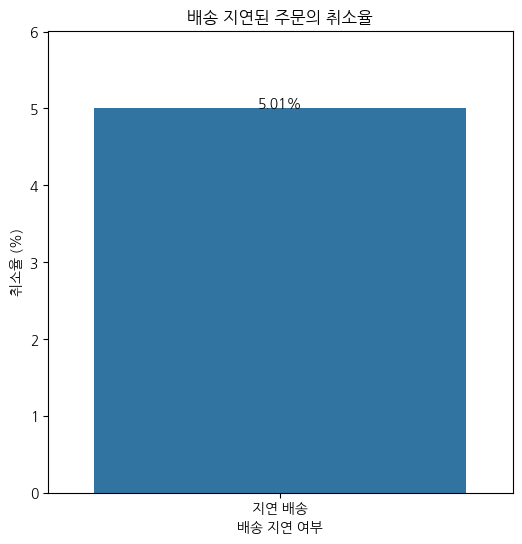

In [212]:
plt.figure(figsize=(6, 6)) # Reduced figure width
# Filter the data to include only delayed deliveries
delayed_cancellation_rate = cancellation_rate_by_delivery[cancellation_rate_by_delivery['is_late_delivery'] == True].copy()

# Create a new column with the desired label for plotting
delayed_cancellation_rate['Delivery Status'] = '지연 배송'

sns.barplot(data=delayed_cancellation_rate, x='Delivery Status', y='cancellation_rate')
plt.xlabel("배송 지연 여부")
plt.ylabel("취소율 (%)")
plt.title("배송 지연된 주문의 취소율")
plt.ylim(0, delayed_cancellation_rate['cancellation_rate'].max() * 1.2) # Adjust y-axis limit for better visibility
# Add text annotations for cancellation rates
for index, row in delayed_cancellation_rate.iterrows():
    plt.text(row['Delivery Status'], row['cancellation_rate'], f'{row["cancellation_rate"]:.2f}%', color='black', ha="center")

plt.show()

<Figure size 600x600 with 0 Axes>

<Axes: xlabel='Delivery Status', ylabel='Order Count'>

Text(0.5, 0, '주문 상태 및 배송 상태')

Text(0, 0.5, '주문 수')

Text(0.5, 1.0, '취소된 주문 중 배송 지연 건 수')

(0.0, 595.1999999999999)

Text(지연 배송 (취소 주문), 496, '496')

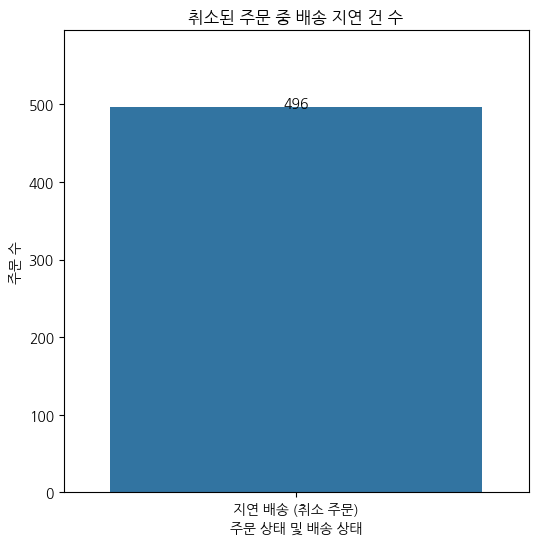

In [213]:
# Filter canceled orders for delayed deliveries
canceled_delayed_orders = canceled_orders_df[canceled_orders_df['is_late_delivery'] == True]

# Count the number of delayed canceled orders
num_canceled_delayed_orders = canceled_delayed_orders.shape[0]

# Create a DataFrame for visualization
canceled_delayed_viz_data = pd.DataFrame({
    'Delivery Status': ['지연 배송 (취소 주문)'],
    'Order Count': [num_canceled_delayed_orders]
})

# Create the bar plot
plt.figure(figsize=(6, 6))
sns.barplot(data=canceled_delayed_viz_data, x='Delivery Status', y='Order Count')
plt.xlabel("주문 상태 및 배송 상태")
plt.ylabel("주문 수")
plt.title("취소된 주문 중 배송 지연 건 수")
plt.ylim(0, num_canceled_delayed_orders * 1.2) # Adjust y-axis limit for better visibility
# Add text annotations for the count
for index, row in canceled_delayed_viz_data.iterrows():
    plt.text(row['Delivery Status'], row['Order Count'], f'{row["Order Count"]}', color='black', ha="center")

plt.show()

<Axes: xlabel='Delivery Status', ylabel='cancellation_rate'>

Text(0.5, 0, '배송 상태')

Text(0, 0.5, '취소율 (%)')

Text(0.5, 1.0, '배송 지연된 주문의 취소율')

(0.0, 6.010906887497475)

Text(지연 배송, 5.009089072914563, '5.01%')

<Axes: xlabel='Delivery Status', ylabel='Order Count'>

Text(0.5, 0, '주문 상태 및 배송 상태')

Text(0, 0.5, '주문 수')

Text(0.5, 1.0, '취소된 주문 중 배송 지연 건 수')

(0.0, 595.1999999999999)

Text(지연 배송 (취소 주문 수), 496, '496')

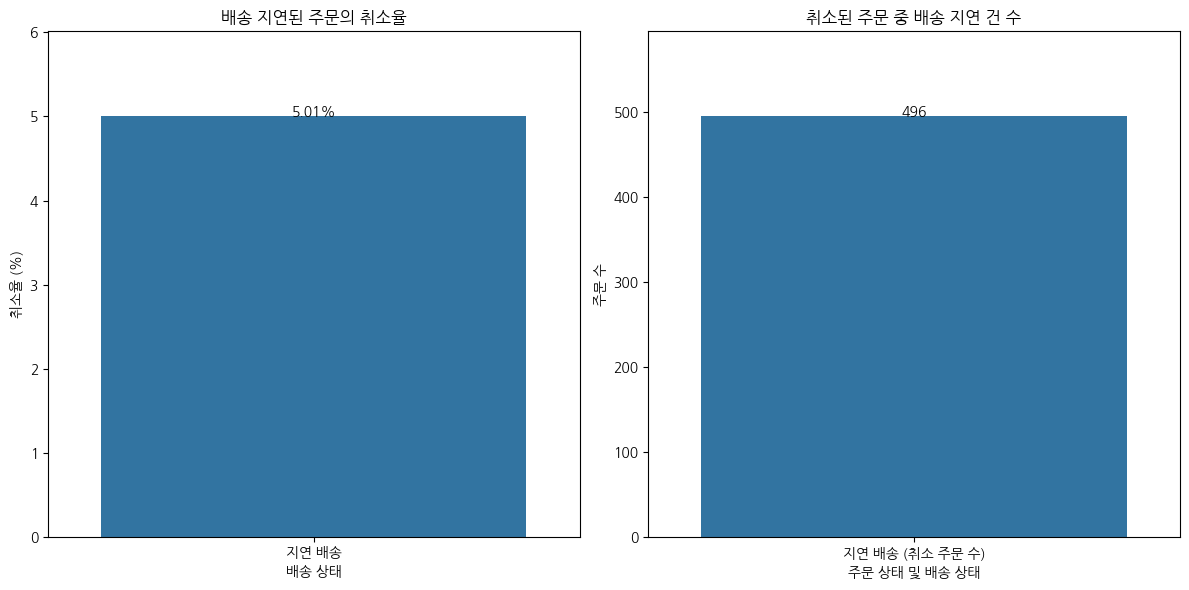

In [214]:
# Data for the first plot (Cancellation Rate by Delayed Delivery Status)
# We can reuse the 'delayed_cancellation_rate' DataFrame created in the previous step (cell v7H8xn_aWvxE)
# Filter the data to include only delayed deliveries
delayed_cancellation_rate_for_plot = cancellation_rate_by_delivery[cancellation_rate_by_delivery['is_late_delivery'] == True].copy()
delayed_cancellation_rate_for_plot['Delivery Status'] = '지연 배송' # Ensure the label is consistent

# Data for the second plot (Count of Delayed Canceled Orders)
# We can reuse the 'canceled_delayed_viz_data' DataFrame created in the previous step (cell 0f1ea96b)
# Filter canceled orders for delayed deliveries
canceled_delayed_orders_for_plot = canceled_orders_df[canceled_orders_df['is_late_delivery'] == True]
# Count the number of delayed canceled orders
num_canceled_delayed_orders_for_plot = canceled_delayed_orders_for_plot.shape[0]
# Create a DataFrame for visualization
canceled_delayed_viz_data_for_plot = pd.DataFrame({
    'Delivery Status': ['지연 배송 (취소 주문 수)'],
    'Order Count': [num_canceled_delayed_orders_for_plot]
})


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # Adjust figsize as needed

# Plot 1: Cancellation Rate for Delayed Orders
sns.barplot(data=delayed_cancellation_rate_for_plot, x='Delivery Status', y='cancellation_rate', ax=axes[0])
axes[0].set_xlabel("배송 상태")
axes[0].set_ylabel("취소율 (%)")
axes[0].set_title("배송 지연된 주문의 취소율")
axes[0].set_ylim(0, delayed_cancellation_rate_for_plot['cancellation_rate'].max() * 1.2)
for index, row in delayed_cancellation_rate_for_plot.iterrows():
    axes[0].text(row['Delivery Status'], row['cancellation_rate'], f'{row["cancellation_rate"]:.2f}%', color='black', ha="center")


# Plot 2: Count of Delayed Canceled Orders
sns.barplot(data=canceled_delayed_viz_data_for_plot, x='Delivery Status', y='Order Count', ax=axes[1])
axes[1].set_xlabel("주문 상태 및 배송 상태")
axes[1].set_ylabel("주문 수")
axes[1].set_title("취소된 주문 중 배송 지연 건 수")
axes[1].set_ylim(0, num_canceled_delayed_orders_for_plot * 1.2)
for index, row in canceled_delayed_viz_data_for_plot.iterrows():
    axes[1].text(row['Delivery Status'], row['Order Count'], f'{row["Order Count"]}', color='black', ha="center")

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()